# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from keras.utils.vis_utils import plot_model
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'False'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.11/dataset/iris.csv')

In [6]:
target_col = 'variety'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(150, 5)

#### Some records

In [12]:
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

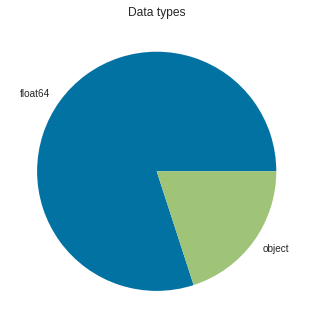

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

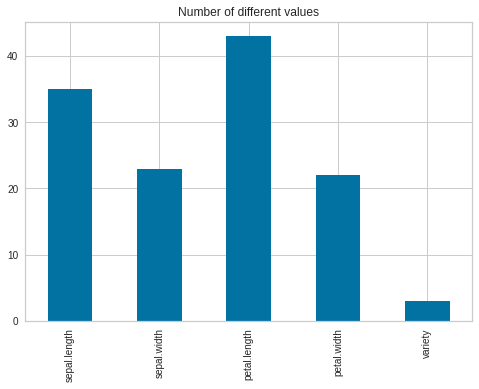

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: sepal.length
Encoding numeric column: sepal.width
Encoding numeric column: petal.length
Encoding numeric column: petal.width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


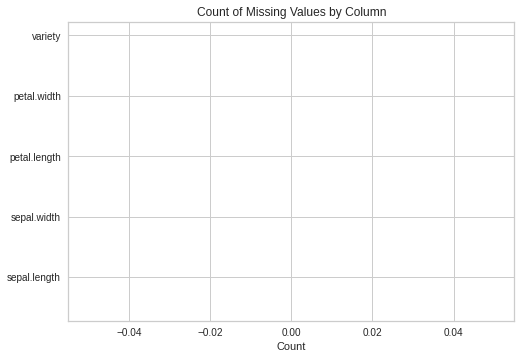

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

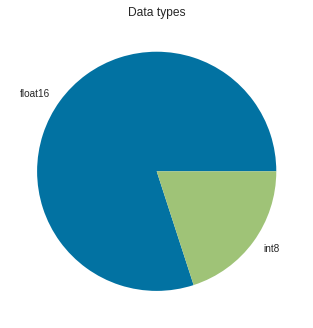

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

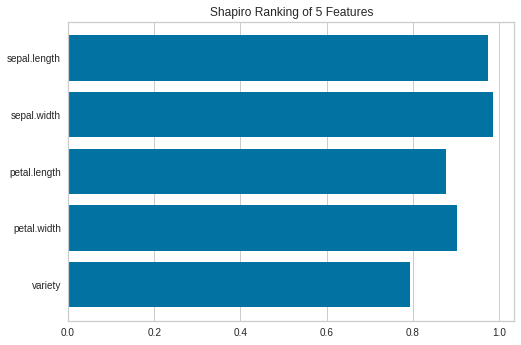

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

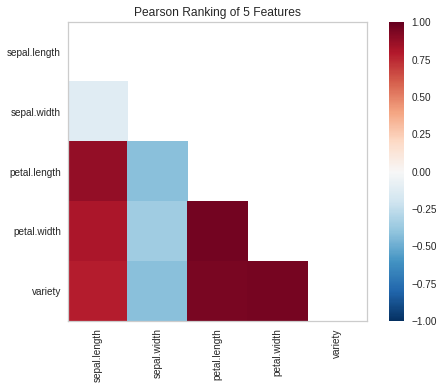

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

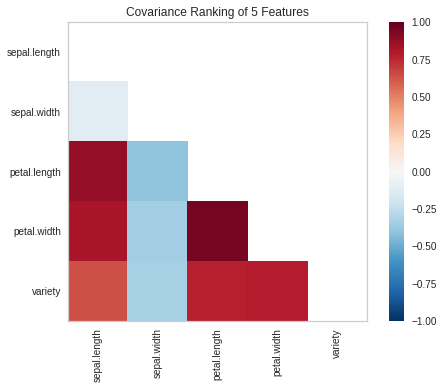

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

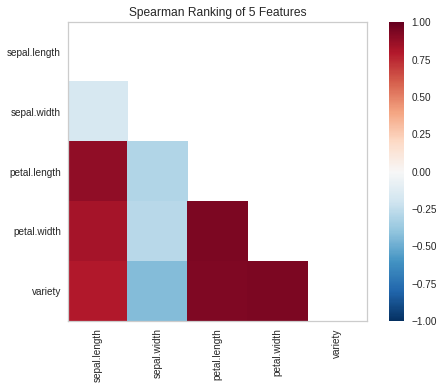

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

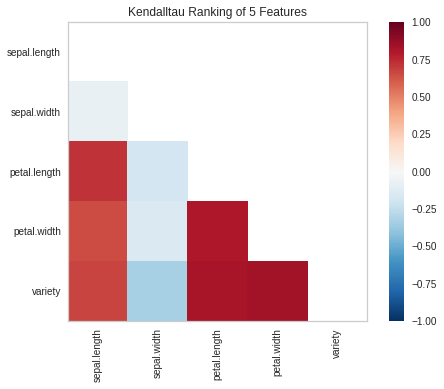

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

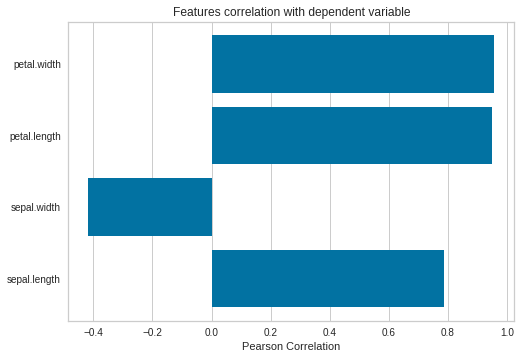

In [35]:
feature_correlation(X, y);

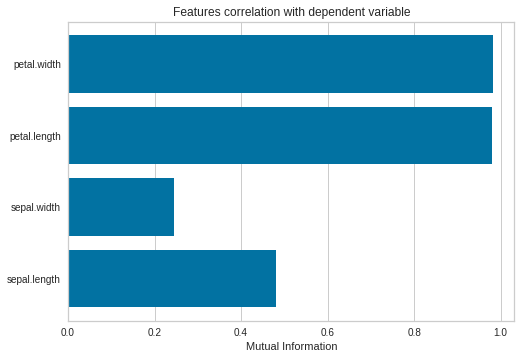

In [36]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

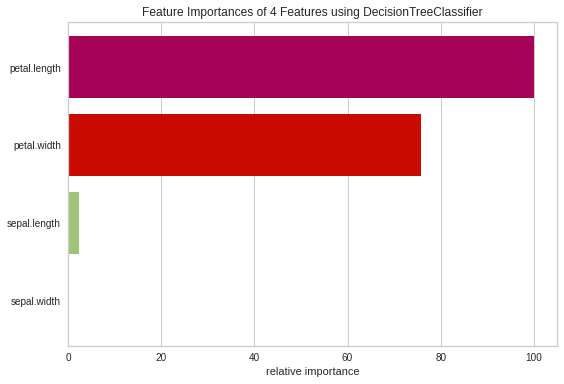

In [37]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

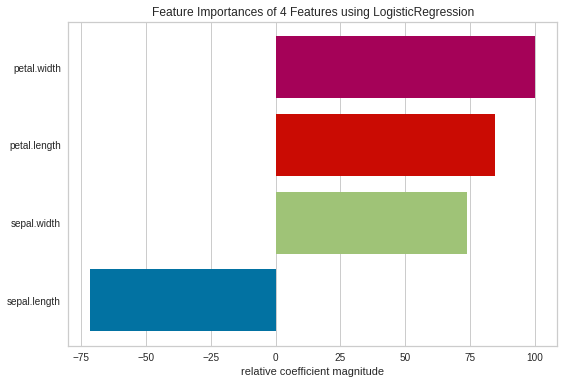

In [38]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

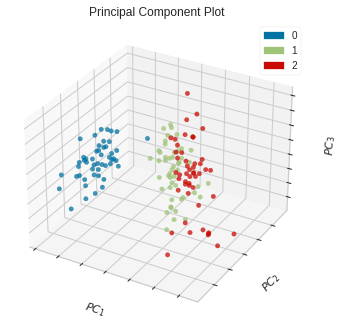

In [39]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

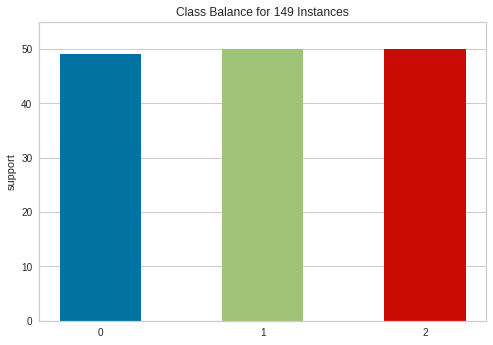

Entropy =  0.9999589074278229


In [40]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splittings 

##### Dimensions

In [41]:
d_F=len(X.columns.tolist())

In [42]:
d_T=len(y.unique())

##### Encoding data

In [43]:
y = pd.get_dummies(df[target_col])

##### Splitting data in train and test sets 

In [44]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=None)

## Modelling

### Model building

##### Keras neural network definition

In [45]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(d_F + d_T + 2, input_dim=d_F, activation='relu')) 
    model.add(BatchNormalization()) 
#    model.add(LayerNormalization()) 
    model.add(Dense(d_T, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

##### Early Stopping

In [46]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [47]:
K_C = KerasBatchClassifier(K_Class,batch_size=64, epochs=2000, callbacks=[es],validation_data=(X_test, y_test), verbose=1)

In [48]:
model = K_C

### Model fitting

In [49]:
%%time
history=model.fit(X_train, y_train)

Epoch 1/2000


1/2 [==============>...............] - ETA: 1s - loss: 1.4430 - accuracy: 0.3125

2/2 [==============================] - 2s 980ms/step - loss: 1.4982 - accuracy: 0.2995 - val_loss: 1.0235 - val_accuracy: 0.3800


Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.4407 - accuracy: 0.3906

2/2 [==============================] - 0s 100ms/step - loss: 1.4672 - accuracy: 0.3524 - val_loss: 1.0095 - val_accuracy: 0.3800


Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.5036 - accuracy: 0.2812

2/2 [==============================] - 0s 142ms/step - loss: 1.4549 - accuracy: 0.3362 - val_loss: 0.9957 - val_accuracy: 0.4200


Epoch 4/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.4169 - accuracy: 0.3750

2/2 [==============================] - 0s 137ms/step - loss: 1.3967 - accuracy: 0.3809 - val_loss: 0.9819 - val_accuracy: 0.5200


Epoch 5/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.4018 - accuracy: 0.3125

2/2 [==============================] - 0s 138ms/step - loss: 1.3549 - accuracy: 0.3601 - val_loss: 0.9684 - val_accuracy: 0.5200


Epoch 6/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.2393 - accuracy: 0.4531

2/2 [==============================] - 0s 122ms/step - loss: 1.2792 - accuracy: 0.4339 - val_loss: 0.9552 - val_accuracy: 0.5600


Epoch 7/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.2222 - accuracy: 0.4531

2/2 [==============================] - 0s 104ms/step - loss: 1.2432 - accuracy: 0.4406 - val_loss: 0.9424 - val_accuracy: 0.5800


Epoch 8/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.1580 - accuracy: 0.4688

2/2 [==============================] - 0s 67ms/step - loss: 1.1882 - accuracy: 0.4593 - val_loss: 0.9298 - val_accuracy: 0.6200


Epoch 9/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.1022 - accuracy: 0.5312

2/2 [==============================] - 0s 77ms/step - loss: 1.1472 - accuracy: 0.4936 - val_loss: 0.9174 - val_accuracy: 0.6400


Epoch 10/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.2299 - accuracy: 0.4219

2/2 [==============================] - 0s 71ms/step - loss: 1.1750 - accuracy: 0.4639 - val_loss: 0.9053 - val_accuracy: 0.6600


Epoch 11/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.9756 - accuracy: 0.6094

2/2 [==============================] - 0s 71ms/step - loss: 1.0725 - accuracy: 0.5398 - val_loss: 0.8935 - val_accuracy: 0.6800


Epoch 12/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.0650 - accuracy: 0.5312

2/2 [==============================] - 0s 160ms/step - loss: 1.0675 - accuracy: 0.5138 - val_loss: 0.8820 - val_accuracy: 0.7200


Epoch 13/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.0580 - accuracy: 0.5312

2/2 [==============================] - 0s 124ms/step - loss: 1.0355 - accuracy: 0.5407 - val_loss: 0.8709 - val_accuracy: 0.7800


Epoch 14/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.9688 - accuracy: 0.5938

2/2 [==============================] - 0s 124ms/step - loss: 0.9786 - accuracy: 0.5750 - val_loss: 0.8601 - val_accuracy: 0.7800


Epoch 15/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.9342 - accuracy: 0.6094

2/2 [==============================] - 0s 149ms/step - loss: 0.9503 - accuracy: 0.5870 - val_loss: 0.8497 - val_accuracy: 0.7800


Epoch 16/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.9558 - accuracy: 0.5625

2/2 [==============================] - 0s 147ms/step - loss: 0.9325 - accuracy: 0.5915 - val_loss: 0.8394 - val_accuracy: 0.7800


Epoch 17/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8783 - accuracy: 0.6562

2/2 [==============================] - 0s 108ms/step - loss: 0.8875 - accuracy: 0.6363 - val_loss: 0.8294 - val_accuracy: 0.7800


Epoch 18/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8500 - accuracy: 0.6719

2/2 [==============================] - 0s 103ms/step - loss: 0.8668 - accuracy: 0.6415 - val_loss: 0.8196 - val_accuracy: 0.7800


Epoch 19/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8638 - accuracy: 0.6562

2/2 [==============================] - 0s 78ms/step - loss: 0.8617 - accuracy: 0.6430 - val_loss: 0.8101 - val_accuracy: 0.8000


Epoch 20/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.8163 - accuracy: 0.6406

2/2 [==============================] - 0s 68ms/step - loss: 0.8206 - accuracy: 0.6378 - val_loss: 0.8009 - val_accuracy: 0.8000


Epoch 21/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7579 - accuracy: 0.7031

2/2 [==============================] - 0s 65ms/step - loss: 0.7859 - accuracy: 0.6654 - val_loss: 0.7918 - val_accuracy: 0.8000


Epoch 22/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8517 - accuracy: 0.6094

2/2 [==============================] - 0s 74ms/step - loss: 0.8084 - accuracy: 0.6274 - val_loss: 0.7828 - val_accuracy: 0.8200


Epoch 23/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8118 - accuracy: 0.6094

2/2 [==============================] - 0s 79ms/step - loss: 0.7765 - accuracy: 0.6274 - val_loss: 0.7742 - val_accuracy: 0.8200


Epoch 24/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7490 - accuracy: 0.6875

2/2 [==============================] - 0s 68ms/step - loss: 0.7579 - accuracy: 0.6736 - val_loss: 0.7657 - val_accuracy: 0.8200


Epoch 25/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7333 - accuracy: 0.6562

2/2 [==============================] - 0s 68ms/step - loss: 0.7289 - accuracy: 0.6632 - val_loss: 0.7574 - val_accuracy: 0.8400


Epoch 26/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6487 - accuracy: 0.7344

2/2 [==============================] - 0s 68ms/step - loss: 0.6929 - accuracy: 0.6960 - val_loss: 0.7494 - val_accuracy: 0.8800


Epoch 27/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6949 - accuracy: 0.6719

2/2 [==============================] - 0s 91ms/step - loss: 0.6977 - accuracy: 0.6886 - val_loss: 0.7414 - val_accuracy: 0.8800


Epoch 28/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6775 - accuracy: 0.7031

2/2 [==============================] - 0s 127ms/step - loss: 0.6776 - accuracy: 0.7058 - val_loss: 0.7337 - val_accuracy: 0.9200


Epoch 29/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7154 - accuracy: 0.6562

2/2 [==============================] - 0s 106ms/step - loss: 0.6851 - accuracy: 0.7036 - val_loss: 0.7261 - val_accuracy: 0.9200


Epoch 30/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6447 - accuracy: 0.7188

2/2 [==============================] - 0s 79ms/step - loss: 0.6513 - accuracy: 0.7312 - val_loss: 0.7186 - val_accuracy: 0.9200


Epoch 31/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6130 - accuracy: 0.8125

2/2 [==============================] - 0s 69ms/step - loss: 0.6342 - accuracy: 0.7759 - val_loss: 0.7112 - val_accuracy: 0.9200


Epoch 32/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6576 - accuracy: 0.7500

2/2 [==============================] - 0s 67ms/step - loss: 0.6499 - accuracy: 0.7551 - val_loss: 0.7040 - val_accuracy: 0.9200


Epoch 33/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6092 - accuracy: 0.7656

2/2 [==============================] - 0s 69ms/step - loss: 0.6157 - accuracy: 0.7670 - val_loss: 0.6969 - val_accuracy: 0.9200


Epoch 34/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6046 - accuracy: 0.7969

2/2 [==============================] - 0s 70ms/step - loss: 0.6079 - accuracy: 0.7909 - val_loss: 0.6898 - val_accuracy: 0.9200


Epoch 35/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6144 - accuracy: 0.7344

2/2 [==============================] - 0s 67ms/step - loss: 0.6102 - accuracy: 0.7566 - val_loss: 0.6829 - val_accuracy: 0.9200


Epoch 36/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6228 - accuracy: 0.7812

2/2 [==============================] - 0s 68ms/step - loss: 0.6010 - accuracy: 0.7991 - val_loss: 0.6761 - val_accuracy: 0.9200


Epoch 37/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5907 - accuracy: 0.7812

2/2 [==============================] - 0s 84ms/step - loss: 0.5819 - accuracy: 0.7924 - val_loss: 0.6693 - val_accuracy: 0.9200


Epoch 38/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5958 - accuracy: 0.8125

2/2 [==============================] - 0s 74ms/step - loss: 0.5786 - accuracy: 0.8163 - val_loss: 0.6626 - val_accuracy: 0.9200


Epoch 39/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5675 - accuracy: 0.7656

2/2 [==============================] - 0s 70ms/step - loss: 0.5668 - accuracy: 0.7805 - val_loss: 0.6562 - val_accuracy: 0.9200


Epoch 40/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5847 - accuracy: 0.7344

2/2 [==============================] - 0s 70ms/step - loss: 0.5667 - accuracy: 0.7768 - val_loss: 0.6497 - val_accuracy: 0.9200


Epoch 41/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5337 - accuracy: 0.8438

2/2 [==============================] - 0s 151ms/step - loss: 0.5365 - accuracy: 0.8334 - val_loss: 0.6433 - val_accuracy: 0.9200


Epoch 42/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5236 - accuracy: 0.8438

2/2 [==============================] - 0s 104ms/step - loss: 0.5345 - accuracy: 0.8334 - val_loss: 0.6371 - val_accuracy: 0.9400


Epoch 43/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4925 - accuracy: 0.8281

2/2 [==============================] - 0s 79ms/step - loss: 0.5111 - accuracy: 0.8282 - val_loss: 0.6309 - val_accuracy: 0.9400


Epoch 44/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5382 - accuracy: 0.8281

2/2 [==============================] - 0s 67ms/step - loss: 0.5217 - accuracy: 0.8350 - val_loss: 0.6246 - val_accuracy: 0.9400


Epoch 45/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4653 - accuracy: 0.8750

2/2 [==============================] - 0s 67ms/step - loss: 0.4918 - accuracy: 0.8573 - val_loss: 0.6185 - val_accuracy: 0.9400


Epoch 46/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4851 - accuracy: 0.8281

2/2 [==============================] - 0s 67ms/step - loss: 0.4949 - accuracy: 0.8282 - val_loss: 0.6125 - val_accuracy: 0.9400


Epoch 47/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5104 - accuracy: 0.8438

2/2 [==============================] - 0s 96ms/step - loss: 0.4958 - accuracy: 0.8402 - val_loss: 0.6065 - val_accuracy: 0.9400


Epoch 48/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4474 - accuracy: 0.8750

2/2 [==============================] - 0s 103ms/step - loss: 0.4693 - accuracy: 0.8506 - val_loss: 0.6008 - val_accuracy: 0.9400


Epoch 49/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4609 - accuracy: 0.8438

2/2 [==============================] - 0s 79ms/step - loss: 0.4709 - accuracy: 0.8402 - val_loss: 0.5951 - val_accuracy: 0.9400


Epoch 50/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4530 - accuracy: 0.8906

2/2 [==============================] - 0s 72ms/step - loss: 0.4668 - accuracy: 0.8693 - val_loss: 0.5894 - val_accuracy: 0.9400


Epoch 51/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4268 - accuracy: 0.9062

2/2 [==============================] - 0s 83ms/step - loss: 0.4481 - accuracy: 0.8677 - val_loss: 0.5839 - val_accuracy: 0.9400


Epoch 52/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4633 - accuracy: 0.8594

2/2 [==============================] - 0s 73ms/step - loss: 0.4580 - accuracy: 0.8588 - val_loss: 0.5782 - val_accuracy: 0.9400


Epoch 53/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4157 - accuracy: 0.8906

2/2 [==============================] - 0s 75ms/step - loss: 0.4343 - accuracy: 0.8693 - val_loss: 0.5728 - val_accuracy: 0.9400


Epoch 54/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4501 - accuracy: 0.8438

2/2 [==============================] - 0s 82ms/step - loss: 0.4407 - accuracy: 0.8536 - val_loss: 0.5674 - val_accuracy: 0.9400


Epoch 55/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4174 - accuracy: 0.8750

2/2 [==============================] - 0s 89ms/step - loss: 0.4275 - accuracy: 0.8641 - val_loss: 0.5620 - val_accuracy: 0.9400


Epoch 56/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4663 - accuracy: 0.8594

2/2 [==============================] - 0s 73ms/step - loss: 0.4636 - accuracy: 0.8723 - val_loss: 0.5566 - val_accuracy: 0.9400


Epoch 57/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4300 - accuracy: 0.8438

2/2 [==============================] - 0s 72ms/step - loss: 0.4219 - accuracy: 0.8604 - val_loss: 0.5514 - val_accuracy: 0.9400


Epoch 58/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4020 - accuracy: 0.8750

2/2 [==============================] - 0s 68ms/step - loss: 0.4105 - accuracy: 0.8775 - val_loss: 0.5463 - val_accuracy: 0.9400


Epoch 59/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3952 - accuracy: 0.8906

2/2 [==============================] - 0s 88ms/step - loss: 0.3996 - accuracy: 0.8827 - val_loss: 0.5413 - val_accuracy: 0.9400


Epoch 60/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4899 - accuracy: 0.8438

2/2 [==============================] - 0s 83ms/step - loss: 0.4537 - accuracy: 0.8738 - val_loss: 0.5363 - val_accuracy: 0.9400


Epoch 61/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3601 - accuracy: 0.9375

2/2 [==============================] - 0s 78ms/step - loss: 0.3906 - accuracy: 0.9051 - val_loss: 0.5315 - val_accuracy: 0.9600


Epoch 62/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4091 - accuracy: 0.8594

2/2 [==============================] - 0s 75ms/step - loss: 0.3941 - accuracy: 0.8791 - val_loss: 0.5268 - val_accuracy: 0.9600


Epoch 63/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3656 - accuracy: 0.9219

2/2 [==============================] - 0s 81ms/step - loss: 0.3766 - accuracy: 0.9268 - val_loss: 0.5219 - val_accuracy: 0.9600


Epoch 64/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3626 - accuracy: 0.9219

2/2 [==============================] - 0s 77ms/step - loss: 0.3787 - accuracy: 0.8999 - val_loss: 0.5173 - val_accuracy: 0.9600


Epoch 65/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - accuracy: 0.9062

2/2 [==============================] - 0s 80ms/step - loss: 0.3696 - accuracy: 0.9014 - val_loss: 0.5126 - val_accuracy: 0.9600


Epoch 66/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3676 - accuracy: 0.8906

2/2 [==============================] - 0s 76ms/step - loss: 0.3668 - accuracy: 0.8962 - val_loss: 0.5080 - val_accuracy: 0.9600


Epoch 67/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3474 - accuracy: 0.9375

2/2 [==============================] - 0s 69ms/step - loss: 0.3588 - accuracy: 0.9118 - val_loss: 0.5036 - val_accuracy: 0.9600


Epoch 68/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3858 - accuracy: 0.9062

2/2 [==============================] - 0s 68ms/step - loss: 0.3668 - accuracy: 0.9283 - val_loss: 0.4992 - val_accuracy: 0.9600


Epoch 69/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3832 - accuracy: 0.8906

2/2 [==============================] - 0s 70ms/step - loss: 0.3660 - accuracy: 0.9097 - val_loss: 0.4948 - val_accuracy: 0.9600


Epoch 70/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3402 - accuracy: 0.9531

2/2 [==============================] - 0s 73ms/step - loss: 0.3494 - accuracy: 0.9440 - val_loss: 0.4904 - val_accuracy: 0.9600


Epoch 71/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3866 - accuracy: 0.8750



2/2 [==============================] - 0s 118ms/step - loss: 0.3606 - accuracy: 0.8977 - val_loss: 0.4860 - val_accuracy: 0.9600


Epoch 72/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3234 - accuracy: 0.9531

2/2 [==============================] - 0s 126ms/step - loss: 0.3376 - accuracy: 0.9440 - val_loss: 0.4818 - val_accuracy: 0.9600


Epoch 73/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3179 - accuracy: 0.9844

2/2 [==============================] - 0s 109ms/step - loss: 0.3274 - accuracy: 0.9611 - val_loss: 0.4777 - val_accuracy: 0.9600


Epoch 74/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2921 - accuracy: 0.9688

2/2 [==============================] - 0s 84ms/step - loss: 0.3237 - accuracy: 0.9492 - val_loss: 0.4735 - val_accuracy: 0.9600


Epoch 75/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3037 - accuracy: 0.9688

2/2 [==============================] - 0s 97ms/step - loss: 0.3189 - accuracy: 0.9492 - val_loss: 0.4696 - val_accuracy: 0.9600


Epoch 76/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2890 - accuracy: 0.9375

2/2 [==============================] - 0s 95ms/step - loss: 0.3108 - accuracy: 0.9388 - val_loss: 0.4655 - val_accuracy: 0.9600


Epoch 77/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3645 - accuracy: 0.9062

2/2 [==============================] - 0s 107ms/step - loss: 0.3592 - accuracy: 0.9081 - val_loss: 0.4614 - val_accuracy: 0.9600


Epoch 78/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3268 - accuracy: 0.9375

2/2 [==============================] - 0s 67ms/step - loss: 0.3175 - accuracy: 0.9455 - val_loss: 0.4578 - val_accuracy: 0.9600


Epoch 79/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3147 - accuracy: 0.9375

2/2 [==============================] - 0s 66ms/step - loss: 0.3092 - accuracy: 0.9522 - val_loss: 0.4542 - val_accuracy: 0.9600


Epoch 80/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3179 - accuracy: 0.9531

2/2 [==============================] - 0s 69ms/step - loss: 0.3137 - accuracy: 0.9574 - val_loss: 0.4506 - val_accuracy: 0.9600


Epoch 81/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2897 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.2974 - accuracy: 0.9679 - val_loss: 0.4470 - val_accuracy: 0.9600


Epoch 82/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2947 - accuracy: 0.9219

2/2 [==============================] - 0s 66ms/step - loss: 0.3005 - accuracy: 0.9268 - val_loss: 0.4434 - val_accuracy: 0.9600


Epoch 83/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2912 - accuracy: 0.9844

2/2 [==============================] - 0s 119ms/step - loss: 0.2923 - accuracy: 0.9679 - val_loss: 0.4396 - val_accuracy: 0.9600


Epoch 84/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2621 - accuracy: 0.9688

2/2 [==============================] - 0s 70ms/step - loss: 0.2864 - accuracy: 0.9492 - val_loss: 0.4360 - val_accuracy: 0.9600


Epoch 85/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3238 - accuracy: 0.9531

2/2 [==============================] - 0s 65ms/step - loss: 0.3078 - accuracy: 0.9642 - val_loss: 0.4322 - val_accuracy: 0.9600


Epoch 86/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3090 - accuracy: 0.9531

2/2 [==============================] - 0s 67ms/step - loss: 0.2971 - accuracy: 0.9507 - val_loss: 0.4287 - val_accuracy: 0.9600


Epoch 87/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.3021 - accuracy: 0.9375

2/2 [==============================] - 0s 64ms/step - loss: 0.2954 - accuracy: 0.9522 - val_loss: 0.4252 - val_accuracy: 0.9600


Epoch 88/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2855 - accuracy: 0.9375

2/2 [==============================] - 0s 67ms/step - loss: 0.2909 - accuracy: 0.9320 - val_loss: 0.4220 - val_accuracy: 0.9600


Epoch 89/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2900 - accuracy: 0.9531

2/2 [==============================] - 0s 87ms/step - loss: 0.2945 - accuracy: 0.9440 - val_loss: 0.4188 - val_accuracy: 0.9600


Epoch 90/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2387 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.2647 - accuracy: 0.9679 - val_loss: 0.4153 - val_accuracy: 0.9600


Epoch 91/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2357 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.2540 - accuracy: 0.9798 - val_loss: 0.4120 - val_accuracy: 0.9600


Epoch 92/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2420 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.2607 - accuracy: 0.9746 - val_loss: 0.4088 - val_accuracy: 0.9600


Epoch 93/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2637 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.2683 - accuracy: 0.9746 - val_loss: 0.4057 - val_accuracy: 0.9600


Epoch 94/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2797 - accuracy: 0.9531

2/2 [==============================] - 0s 64ms/step - loss: 0.2667 - accuracy: 0.9642 - val_loss: 0.4023 - val_accuracy: 0.9600


Epoch 95/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2796 - accuracy: 0.9531

2/2 [==============================] - 0s 63ms/step - loss: 0.2761 - accuracy: 0.9507 - val_loss: 0.3989 - val_accuracy: 0.9600


Epoch 96/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2285 - accuracy: 0.9844

2/2 [==============================] - 0s 88ms/step - loss: 0.2436 - accuracy: 0.9746 - val_loss: 0.3959 - val_accuracy: 0.9600


Epoch 97/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2408 - accuracy: 0.9531

2/2 [==============================] - 0s 68ms/step - loss: 0.2473 - accuracy: 0.9574 - val_loss: 0.3929 - val_accuracy: 0.9600


Epoch 98/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2417 - accuracy: 0.9688

2/2 [==============================] - 0s 79ms/step - loss: 0.2440 - accuracy: 0.9694 - val_loss: 0.3901 - val_accuracy: 0.9600


Epoch 99/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2481 - accuracy: 0.9844

2/2 [==============================] - 0s 90ms/step - loss: 0.2575 - accuracy: 0.9679 - val_loss: 0.3872 - val_accuracy: 0.9600


Epoch 100/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2809 - accuracy: 0.9531

2/2 [==============================] - 0s 66ms/step - loss: 0.2601 - accuracy: 0.9642 - val_loss: 0.3842 - val_accuracy: 0.9600


Epoch 101/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2293 - accuracy: 0.9688

2/2 [==============================] - 0s 88ms/step - loss: 0.2347 - accuracy: 0.9761 - val_loss: 0.3814 - val_accuracy: 0.9800


Epoch 102/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2577 - accuracy: 0.9531

2/2 [==============================] - 0s 72ms/step - loss: 0.2432 - accuracy: 0.9574 - val_loss: 0.3786 - val_accuracy: 0.9800


Epoch 103/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2385 - accuracy: 0.9688

2/2 [==============================] - 0s 83ms/step - loss: 0.2370 - accuracy: 0.9761 - val_loss: 0.3758 - val_accuracy: 0.9800


Epoch 104/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2523 - accuracy: 0.9688

2/2 [==============================] - 0s 77ms/step - loss: 0.2436 - accuracy: 0.9694 - val_loss: 0.3730 - val_accuracy: 0.9800


Epoch 105/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2204 - accuracy: 0.9844

2/2 [==============================] - 0s 99ms/step - loss: 0.2209 - accuracy: 0.9813 - val_loss: 0.3704 - val_accuracy: 0.9600


Epoch 106/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.2426 - accuracy: 0.9531

2/2 [==============================] - 0s 90ms/step - loss: 0.2346 - accuracy: 0.9642 - val_loss: 0.3679 - val_accuracy: 0.9400


Epoch 107/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2204 - accuracy: 0.9688

2/2 [==============================] - 0s 94ms/step - loss: 0.2273 - accuracy: 0.9694 - val_loss: 0.3653 - val_accuracy: 0.9400


Epoch 108/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2199 - accuracy: 0.9688

2/2 [==============================] - 0s 99ms/step - loss: 0.2202 - accuracy: 0.9694 - val_loss: 0.3629 - val_accuracy: 0.9400


Epoch 109/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2185 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.2226 - accuracy: 0.9746 - val_loss: 0.3603 - val_accuracy: 0.9400


Epoch 110/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2288 - accuracy: 0.9688

2/2 [==============================] - 0s 82ms/step - loss: 0.2259 - accuracy: 0.9761 - val_loss: 0.3578 - val_accuracy: 0.9400


Epoch 111/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2106 - accuracy: 0.9688

2/2 [==============================] - 0s 105ms/step - loss: 0.2123 - accuracy: 0.9694 - val_loss: 0.3555 - val_accuracy: 0.9400


Epoch 112/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.2401 - accuracy: 0.9531

2/2 [==============================] - 0s 115ms/step - loss: 0.2224 - accuracy: 0.9642 - val_loss: 0.3531 - val_accuracy: 0.9400


Epoch 113/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1819 - accuracy: 1.0000

2/2 [==============================] - 0s 88ms/step - loss: 0.2036 - accuracy: 0.9865 - val_loss: 0.3507 - val_accuracy: 0.9400


Epoch 114/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2452 - accuracy: 0.9531

2/2 [==============================] - 0s 77ms/step - loss: 0.2255 - accuracy: 0.9642 - val_loss: 0.3480 - val_accuracy: 0.9400


Epoch 115/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2270 - accuracy: 0.9531

2/2 [==============================] - 0s 64ms/step - loss: 0.2160 - accuracy: 0.9642 - val_loss: 0.3458 - val_accuracy: 0.9400


Epoch 116/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2254 - accuracy: 0.9531

2/2 [==============================] - 0s 76ms/step - loss: 0.2166 - accuracy: 0.9642 - val_loss: 0.3433 - val_accuracy: 0.9400


Epoch 117/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2052 - accuracy: 0.9844

2/2 [==============================] - 0s 78ms/step - loss: 0.2078 - accuracy: 0.9881 - val_loss: 0.3412 - val_accuracy: 0.9400


Epoch 118/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1961 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.2012 - accuracy: 0.9679 - val_loss: 0.3390 - val_accuracy: 0.9400


Epoch 119/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1981 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.1983 - accuracy: 0.9881 - val_loss: 0.3368 - val_accuracy: 0.9400


Epoch 120/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2017 - accuracy: 0.9688

2/2 [==============================] - 0s 86ms/step - loss: 0.2088 - accuracy: 0.9694 - val_loss: 0.3350 - val_accuracy: 0.9400


Epoch 121/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2166 - accuracy: 0.9688

2/2 [==============================] - 0s 65ms/step - loss: 0.2073 - accuracy: 0.9694 - val_loss: 0.3328 - val_accuracy: 0.9400


Epoch 122/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2042 - accuracy: 0.9688

2/2 [==============================] - 0s 65ms/step - loss: 0.1992 - accuracy: 0.9761 - val_loss: 0.3308 - val_accuracy: 0.9400


Epoch 123/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1836 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1877 - accuracy: 0.9813 - val_loss: 0.3290 - val_accuracy: 0.9400


Epoch 124/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2067 - accuracy: 0.9531

2/2 [==============================] - 0s 66ms/step - loss: 0.1977 - accuracy: 0.9642 - val_loss: 0.3270 - val_accuracy: 0.9400


Epoch 125/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2311 - accuracy: 0.9531

2/2 [==============================] - 0s 98ms/step - loss: 0.2131 - accuracy: 0.9642 - val_loss: 0.3249 - val_accuracy: 0.9400


Epoch 126/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1716 - accuracy: 0.9844

2/2 [==============================] - 0s 92ms/step - loss: 0.1863 - accuracy: 0.9813 - val_loss: 0.3230 - val_accuracy: 0.9400


Epoch 127/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1859 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.1853 - accuracy: 0.9813 - val_loss: 0.3213 - val_accuracy: 0.9400


Epoch 128/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.2094 - accuracy: 0.9688

2/2 [==============================] - 0s 64ms/step - loss: 0.1941 - accuracy: 0.9761 - val_loss: 0.3193 - val_accuracy: 0.9400


Epoch 129/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1763 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1794 - accuracy: 0.9813 - val_loss: 0.3175 - val_accuracy: 0.9400


Epoch 130/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1834 - accuracy: 0.9688

2/2 [==============================] - 0s 70ms/step - loss: 0.1858 - accuracy: 0.9761 - val_loss: 0.3157 - val_accuracy: 0.9400


Epoch 131/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1983 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.1982 - accuracy: 0.9881 - val_loss: 0.3141 - val_accuracy: 0.9400


Epoch 132/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1944 - accuracy: 0.9688

2/2 [==============================] - 0s 85ms/step - loss: 0.1870 - accuracy: 0.9694 - val_loss: 0.3123 - val_accuracy: 0.9400


Epoch 133/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1829 - accuracy: 0.9844

2/2 [==============================] - 0s 84ms/step - loss: 0.1769 - accuracy: 0.9881 - val_loss: 0.3107 - val_accuracy: 0.9400


Epoch 134/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1734 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1745 - accuracy: 0.9881 - val_loss: 0.3092 - val_accuracy: 0.9400


Epoch 135/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1724 - accuracy: 0.9688

2/2 [==============================] - 0s 64ms/step - loss: 0.1766 - accuracy: 0.9694 - val_loss: 0.3074 - val_accuracy: 0.9400


Epoch 136/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1604 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.1829 - accuracy: 0.9865 - val_loss: 0.3054 - val_accuracy: 0.9400


Epoch 137/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1702 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.1734 - accuracy: 0.9933 - val_loss: 0.3036 - val_accuracy: 0.9400


Epoch 138/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1674 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.1686 - accuracy: 0.9933 - val_loss: 0.3018 - val_accuracy: 0.9400


Epoch 139/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1558 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.1686 - accuracy: 0.9881 - val_loss: 0.2998 - val_accuracy: 0.9400


Epoch 140/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1702 - accuracy: 0.9844

2/2 [==============================] - 0s 99ms/step - loss: 0.1667 - accuracy: 0.9881 - val_loss: 0.2979 - val_accuracy: 0.9400


Epoch 141/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1627 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.1686 - accuracy: 0.9813 - val_loss: 0.2958 - val_accuracy: 0.9400


Epoch 142/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1487 - accuracy: 0.9688

2/2 [==============================] - 0s 70ms/step - loss: 0.1631 - accuracy: 0.9626 - val_loss: 0.2941 - val_accuracy: 0.9400


Epoch 143/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1651 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.1679 - accuracy: 0.9881 - val_loss: 0.2922 - val_accuracy: 0.9400


Epoch 144/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1880 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.1732 - accuracy: 0.9881 - val_loss: 0.2903 - val_accuracy: 0.9400


Epoch 145/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1410 - accuracy: 0.9844

2/2 [==============================] - 0s 76ms/step - loss: 0.1503 - accuracy: 0.9813 - val_loss: 0.2885 - val_accuracy: 0.9400


Epoch 146/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1679 - accuracy: 0.9688



2/2 [==============================] - 0s 99ms/step - loss: 0.1671 - accuracy: 0.9761 - val_loss: 0.2866 - val_accuracy: 0.9400


Epoch 147/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1484 - accuracy: 0.9531

2/2 [==============================] - 0s 71ms/step - loss: 0.1788 - accuracy: 0.9507 - val_loss: 0.2851 - val_accuracy: 0.9400


Epoch 148/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1738 - accuracy: 0.9688

2/2 [==============================] - 0s 72ms/step - loss: 0.1769 - accuracy: 0.9694 - val_loss: 0.2828 - val_accuracy: 0.9400


Epoch 149/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1760 - accuracy: 0.9531

2/2 [==============================] - 0s 88ms/step - loss: 0.1754 - accuracy: 0.9574 - val_loss: 0.2809 - val_accuracy: 0.9400


Epoch 150/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1505 - accuracy: 0.9844

2/2 [==============================] - 0s 79ms/step - loss: 0.1540 - accuracy: 0.9881 - val_loss: 0.2791 - val_accuracy: 0.9400


Epoch 151/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1505 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.1558 - accuracy: 0.9881 - val_loss: 0.2774 - val_accuracy: 0.9400


Epoch 152/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1702 - accuracy: 0.9688

2/2 [==============================] - 0s 78ms/step - loss: 0.1624 - accuracy: 0.9761 - val_loss: 0.2758 - val_accuracy: 0.9400


Epoch 153/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1706 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.1627 - accuracy: 0.9881 - val_loss: 0.2744 - val_accuracy: 0.9400


Epoch 154/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1615 - accuracy: 0.9844

2/2 [==============================] - 0s 98ms/step - loss: 0.1531 - accuracy: 0.9881 - val_loss: 0.2728 - val_accuracy: 0.9400


Epoch 155/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1622 - accuracy: 0.9531

2/2 [==============================] - 0s 81ms/step - loss: 0.1637 - accuracy: 0.9574 - val_loss: 0.2712 - val_accuracy: 0.9400


Epoch 156/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1544 - accuracy: 0.9688

2/2 [==============================] - 0s 65ms/step - loss: 0.1565 - accuracy: 0.9694 - val_loss: 0.2701 - val_accuracy: 0.9400


Epoch 157/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1631 - accuracy: 0.9844

2/2 [==============================] - 0s 76ms/step - loss: 0.1534 - accuracy: 0.9881 - val_loss: 0.2687 - val_accuracy: 0.9400


Epoch 158/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1322 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.1490 - accuracy: 0.9881 - val_loss: 0.2670 - val_accuracy: 0.9400


Epoch 159/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1469 - accuracy: 0.9844

2/2 [==============================] - 0s 113ms/step - loss: 0.1458 - accuracy: 0.9881 - val_loss: 0.2655 - val_accuracy: 0.9400


Epoch 160/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1544 - accuracy: 0.9844

2/2 [==============================] - 0s 98ms/step - loss: 0.1502 - accuracy: 0.9881 - val_loss: 0.2641 - val_accuracy: 0.9400


Epoch 161/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1561 - accuracy: 0.9844

2/2 [==============================] - 0s 92ms/step - loss: 0.1496 - accuracy: 0.9881 - val_loss: 0.2625 - val_accuracy: 0.9600


Epoch 162/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1487 - accuracy: 0.9844

2/2 [==============================] - 0s 109ms/step - loss: 0.1476 - accuracy: 0.9881 - val_loss: 0.2610 - val_accuracy: 0.9600


Epoch 163/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1379 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.1412 - accuracy: 0.9933 - val_loss: 0.2595 - val_accuracy: 0.9600


Epoch 164/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1491 - accuracy: 1.0000

2/2 [==============================] - 0s 102ms/step - loss: 0.1449 - accuracy: 0.9933 - val_loss: 0.2577 - val_accuracy: 0.9600


Epoch 165/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1604 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.1610 - accuracy: 0.9813 - val_loss: 0.2564 - val_accuracy: 0.9600


Epoch 166/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1583 - accuracy: 0.9844

2/2 [==============================] - 0s 103ms/step - loss: 0.1501 - accuracy: 0.9881 - val_loss: 0.2548 - val_accuracy: 0.9600


Epoch 167/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1339 - accuracy: 0.9844

2/2 [==============================] - 0s 81ms/step - loss: 0.1382 - accuracy: 0.9881 - val_loss: 0.2532 - val_accuracy: 0.9600


Epoch 168/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1501 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.1459 - accuracy: 0.9933 - val_loss: 0.2516 - val_accuracy: 0.9600


Epoch 169/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1289 - accuracy: 1.0000

2/2 [==============================] - 0s 98ms/step - loss: 0.1401 - accuracy: 0.9933 - val_loss: 0.2496 - val_accuracy: 0.9600


Epoch 170/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1414 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.1366 - accuracy: 0.9881 - val_loss: 0.2479 - val_accuracy: 0.9600


Epoch 171/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1719 - accuracy: 0.9531

2/2 [==============================] - 0s 69ms/step - loss: 0.1554 - accuracy: 0.9642 - val_loss: 0.2461 - val_accuracy: 0.9600


Epoch 172/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1244 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.1295 - accuracy: 0.9933 - val_loss: 0.2446 - val_accuracy: 0.9600


Epoch 173/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1230 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.1304 - accuracy: 0.9881 - val_loss: 0.2429 - val_accuracy: 0.9600


Epoch 174/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1171 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.1304 - accuracy: 0.9933 - val_loss: 0.2414 - val_accuracy: 0.9600


Epoch 175/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1239 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.1298 - accuracy: 0.9881 - val_loss: 0.2395 - val_accuracy: 0.9800


Epoch 176/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1484 - accuracy: 0.9844

2/2 [==============================] - 0s 82ms/step - loss: 0.1416 - accuracy: 0.9881 - val_loss: 0.2381 - val_accuracy: 0.9800


Epoch 177/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1247 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.1266 - accuracy: 0.9881 - val_loss: 0.2367 - val_accuracy: 0.9800


Epoch 178/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1396 - accuracy: 0.9844

2/2 [==============================] - 0s 83ms/step - loss: 0.1337 - accuracy: 0.9881 - val_loss: 0.2353 - val_accuracy: 0.9800


Epoch 179/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1461 - accuracy: 0.9688

2/2 [==============================] - 0s 122ms/step - loss: 0.1437 - accuracy: 0.9694 - val_loss: 0.2338 - val_accuracy: 0.9800


Epoch 180/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1433 - accuracy: 0.9844

2/2 [==============================] - 0s 131ms/step - loss: 0.1319 - accuracy: 0.9881 - val_loss: 0.2328 - val_accuracy: 0.9800


Epoch 181/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1552 - accuracy: 0.9844

2/2 [==============================] - 0s 116ms/step - loss: 0.1415 - accuracy: 0.9881 - val_loss: 0.2317 - val_accuracy: 0.9800


Epoch 182/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1227 - accuracy: 0.9844

2/2 [==============================] - 0s 77ms/step - loss: 0.1389 - accuracy: 0.9813 - val_loss: 0.2308 - val_accuracy: 0.9800


Epoch 183/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1127 - accuracy: 1.0000

2/2 [==============================] - 0s 94ms/step - loss: 0.1183 - accuracy: 0.9933 - val_loss: 0.2296 - val_accuracy: 0.9800


Epoch 184/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1167 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.1204 - accuracy: 0.9933 - val_loss: 0.2284 - val_accuracy: 0.9800


Epoch 185/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1369 - accuracy: 0.9844

2/2 [==============================] - 0s 87ms/step - loss: 0.1261 - accuracy: 0.9881 - val_loss: 0.2271 - val_accuracy: 0.9800


Epoch 186/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1484 - accuracy: 0.9688

2/2 [==============================] - 0s 80ms/step - loss: 0.1447 - accuracy: 0.9694 - val_loss: 0.2257 - val_accuracy: 0.9600


Epoch 187/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1315 - accuracy: 1.0000

2/2 [==============================] - 0s 75ms/step - loss: 0.1369 - accuracy: 0.9865 - val_loss: 0.2248 - val_accuracy: 0.9600


Epoch 188/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1310 - accuracy: 0.9844

2/2 [==============================] - 0s 86ms/step - loss: 0.1244 - accuracy: 0.9881 - val_loss: 0.2236 - val_accuracy: 0.9600


Epoch 189/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1100 - accuracy: 1.0000

2/2 [==============================] - 0s 87ms/step - loss: 0.1158 - accuracy: 0.9933 - val_loss: 0.2223 - val_accuracy: 0.9600


Epoch 190/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1181 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.1226 - accuracy: 0.9746 - val_loss: 0.2211 - val_accuracy: 0.9600


Epoch 191/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1229 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.1206 - accuracy: 0.9881 - val_loss: 0.2198 - val_accuracy: 0.9600


Epoch 192/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1271 - accuracy: 0.9844

2/2 [==============================] - 0s 76ms/step - loss: 0.1195 - accuracy: 0.9881 - val_loss: 0.2186 - val_accuracy: 0.9600


Epoch 193/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1091 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.1111 - accuracy: 0.9933 - val_loss: 0.2175 - val_accuracy: 0.9600


Epoch 194/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1068 - accuracy: 0.9844

2/2 [==============================] - 0s 79ms/step - loss: 0.1162 - accuracy: 0.9881 - val_loss: 0.2163 - val_accuracy: 0.9600


Epoch 195/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1132 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.1174 - accuracy: 0.9813 - val_loss: 0.2154 - val_accuracy: 0.9600


Epoch 196/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1389 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.1245 - accuracy: 0.9881 - val_loss: 0.2142 - val_accuracy: 0.9600


Epoch 197/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1120 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.1297 - accuracy: 0.9746 - val_loss: 0.2134 - val_accuracy: 0.9400


Epoch 198/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1142 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.1147 - accuracy: 0.9881 - val_loss: 0.2124 - val_accuracy: 0.9400


Epoch 199/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1060 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.1122 - accuracy: 0.9881 - val_loss: 0.2115 - val_accuracy: 0.9400


Epoch 200/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1245 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1276 - accuracy: 0.9881 - val_loss: 0.2102 - val_accuracy: 0.9400


Epoch 201/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1153 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.1244 - accuracy: 0.9865 - val_loss: 0.2094 - val_accuracy: 0.9400


Epoch 202/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1092 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.1115 - accuracy: 0.9881 - val_loss: 0.2087 - val_accuracy: 0.9400


Epoch 203/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1108 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1091 - accuracy: 0.9881 - val_loss: 0.2083 - val_accuracy: 0.9400


Epoch 204/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1209 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.1154 - accuracy: 0.9881 - val_loss: 0.2076 - val_accuracy: 0.9400


Epoch 205/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1133 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.1183 - accuracy: 0.9933 - val_loss: 0.2069 - val_accuracy: 0.9400


Epoch 206/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0966 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1040 - accuracy: 0.9881 - val_loss: 0.2064 - val_accuracy: 0.9400


Epoch 207/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1250 - accuracy: 0.9844

2/2 [==============================] - 0s 84ms/step - loss: 0.1184 - accuracy: 0.9813 - val_loss: 0.2058 - val_accuracy: 0.9400


Epoch 208/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1088 - accuracy: 0.9844

2/2 [==============================] - 0s 79ms/step - loss: 0.1089 - accuracy: 0.9881 - val_loss: 0.2054 - val_accuracy: 0.9400


Epoch 209/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1204 - accuracy: 0.9531

2/2 [==============================] - 0s 69ms/step - loss: 0.1174 - accuracy: 0.9642 - val_loss: 0.2050 - val_accuracy: 0.9400


Epoch 210/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0973 - accuracy: 1.0000

2/2 [==============================] - 0s 91ms/step - loss: 0.1063 - accuracy: 0.9865 - val_loss: 0.2041 - val_accuracy: 0.9400


Epoch 211/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1177 - accuracy: 0.9844

2/2 [==============================] - 0s 91ms/step - loss: 0.1106 - accuracy: 0.9881 - val_loss: 0.2032 - val_accuracy: 0.9400


Epoch 212/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1240 - accuracy: 0.9844

2/2 [==============================] - 0s 114ms/step - loss: 0.1188 - accuracy: 0.9881 - val_loss: 0.2021 - val_accuracy: 0.9400


Epoch 213/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1280 - accuracy: 0.9844

2/2 [==============================] - 0s 92ms/step - loss: 0.1149 - accuracy: 0.9881 - val_loss: 0.2013 - val_accuracy: 0.9400


Epoch 214/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1181 - accuracy: 0.9688

2/2 [==============================] - 0s 77ms/step - loss: 0.1108 - accuracy: 0.9761 - val_loss: 0.2003 - val_accuracy: 0.9400


Epoch 215/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0915 - accuracy: 1.0000

2/2 [==============================] - 0s 98ms/step - loss: 0.1001 - accuracy: 0.9933 - val_loss: 0.1993 - val_accuracy: 0.9400


Epoch 216/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.1224 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.1127 - accuracy: 0.9881 - val_loss: 0.1982 - val_accuracy: 0.9400


Epoch 217/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1000 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.1026 - accuracy: 0.9933 - val_loss: 0.1973 - val_accuracy: 0.9400


Epoch 218/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1121 - accuracy: 0.9531

2/2 [==============================] - 0s 87ms/step - loss: 0.1207 - accuracy: 0.9507 - val_loss: 0.1965 - val_accuracy: 0.9400


Epoch 219/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1058 - accuracy: 1.0000

2/2 [==============================] - 0s 81ms/step - loss: 0.1075 - accuracy: 0.9865 - val_loss: 0.1955 - val_accuracy: 0.9400


Epoch 220/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0853 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.1000 - accuracy: 0.9746 - val_loss: 0.1947 - val_accuracy: 0.9400


Epoch 221/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0762 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0931 - accuracy: 0.9933 - val_loss: 0.1937 - val_accuracy: 0.9400


Epoch 222/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1051 - accuracy: 0.9688

2/2 [==============================] - 0s 80ms/step - loss: 0.1053 - accuracy: 0.9761 - val_loss: 0.1930 - val_accuracy: 0.9400


Epoch 223/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1002 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0996 - accuracy: 0.9933 - val_loss: 0.1921 - val_accuracy: 0.9400


Epoch 224/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0813 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0975 - accuracy: 0.9865 - val_loss: 0.1911 - val_accuracy: 0.9400


Epoch 225/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1170 - accuracy: 0.9531

2/2 [==============================] - 0s 92ms/step - loss: 0.1162 - accuracy: 0.9642 - val_loss: 0.1906 - val_accuracy: 0.9400


Epoch 226/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0959 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0968 - accuracy: 0.9933 - val_loss: 0.1898 - val_accuracy: 0.9400


Epoch 227/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1194 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.1204 - accuracy: 0.9881 - val_loss: 0.1886 - val_accuracy: 0.9400


Epoch 228/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0940 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0981 - accuracy: 0.9933 - val_loss: 0.1877 - val_accuracy: 0.9400


Epoch 229/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1054 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.1161 - accuracy: 0.9813 - val_loss: 0.1866 - val_accuracy: 0.9400


Epoch 230/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0841 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.1003 - accuracy: 0.9746 - val_loss: 0.1858 - val_accuracy: 0.9600


Epoch 231/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1073 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.1012 - accuracy: 0.9881 - val_loss: 0.1848 - val_accuracy: 0.9600


Epoch 232/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1136 - accuracy: 0.9844

2/2 [==============================] - 0s 86ms/step - loss: 0.1119 - accuracy: 0.9746 - val_loss: 0.1839 - val_accuracy: 0.9600


Epoch 233/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0983 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0991 - accuracy: 0.9813 - val_loss: 0.1830 - val_accuracy: 0.9600


Epoch 234/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1007 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.1038 - accuracy: 0.9813 - val_loss: 0.1824 - val_accuracy: 0.9600


Epoch 235/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0890 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.1071 - accuracy: 0.9813 - val_loss: 0.1815 - val_accuracy: 0.9600


Epoch 236/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0905 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0961 - accuracy: 0.9933 - val_loss: 0.1808 - val_accuracy: 0.9600


Epoch 237/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0941 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0962 - accuracy: 0.9881 - val_loss: 0.1800 - val_accuracy: 0.9600


Epoch 238/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0858 - accuracy: 1.0000

2/2 [==============================] - 0s 95ms/step - loss: 0.1026 - accuracy: 0.9933 - val_loss: 0.1791 - val_accuracy: 0.9600


Epoch 239/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0860 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.0921 - accuracy: 0.9813 - val_loss: 0.1782 - val_accuracy: 0.9600


Epoch 240/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0886 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0895 - accuracy: 0.9881 - val_loss: 0.1775 - val_accuracy: 0.9600


Epoch 241/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0866 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0896 - accuracy: 1.0000 - val_loss: 0.1767 - val_accuracy: 0.9600


Epoch 242/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1030 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0979 - accuracy: 0.9813 - val_loss: 0.1760 - val_accuracy: 0.9600


Epoch 243/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0914 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0910 - accuracy: 0.9933 - val_loss: 0.1754 - val_accuracy: 0.9600


Epoch 244/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0848 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0890 - accuracy: 0.9933 - val_loss: 0.1746 - val_accuracy: 0.9600


Epoch 245/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1021 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0999 - accuracy: 0.9813 - val_loss: 0.1740 - val_accuracy: 0.9600


Epoch 246/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0837 - accuracy: 1.0000

2/2 [==============================] - 0s 86ms/step - loss: 0.0860 - accuracy: 0.9933 - val_loss: 0.1734 - val_accuracy: 0.9600


Epoch 247/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0844 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0877 - accuracy: 0.9933 - val_loss: 0.1729 - val_accuracy: 0.9600


Epoch 248/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0933 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.0934 - accuracy: 0.9881 - val_loss: 0.1723 - val_accuracy: 0.9600


Epoch 249/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0790 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0858 - accuracy: 0.9933 - val_loss: 0.1719 - val_accuracy: 0.9600


Epoch 250/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1080 - accuracy: 0.9844

2/2 [==============================] - 0s 97ms/step - loss: 0.0996 - accuracy: 0.9881 - val_loss: 0.1714 - val_accuracy: 0.9600


Epoch 251/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0831 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0881 - accuracy: 0.9933 - val_loss: 0.1710 - val_accuracy: 0.9600


Epoch 252/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0826 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0844 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9600


Epoch 253/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1047 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0992 - accuracy: 0.9813 - val_loss: 0.1699 - val_accuracy: 0.9600


Epoch 254/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0895 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0868 - accuracy: 0.9881 - val_loss: 0.1695 - val_accuracy: 0.9600


Epoch 255/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0852 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0857 - accuracy: 0.9881 - val_loss: 0.1691 - val_accuracy: 0.9600


Epoch 256/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0873 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0898 - accuracy: 0.9881 - val_loss: 0.1687 - val_accuracy: 0.9600


Epoch 257/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0768 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.0810 - accuracy: 0.9881 - val_loss: 0.1684 - val_accuracy: 0.9600


Epoch 258/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0935 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0866 - accuracy: 0.9881 - val_loss: 0.1681 - val_accuracy: 0.9600


Epoch 259/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0938 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0896 - accuracy: 0.9881 - val_loss: 0.1679 - val_accuracy: 0.9600


Epoch 260/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0819 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0830 - accuracy: 0.9881 - val_loss: 0.1677 - val_accuracy: 0.9600


Epoch 261/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0933 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0878 - accuracy: 0.9881 - val_loss: 0.1674 - val_accuracy: 0.9600


Epoch 262/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0812 - accuracy: 0.9933 - val_loss: 0.1671 - val_accuracy: 0.9600


Epoch 263/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0930 - accuracy: 0.9531

2/2 [==============================] - 0s 65ms/step - loss: 0.0987 - accuracy: 0.9507 - val_loss: 0.1670 - val_accuracy: 0.9600


Epoch 264/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0937 - accuracy: 0.9844

2/2 [==============================] - 0s 86ms/step - loss: 0.0895 - accuracy: 0.9881 - val_loss: 0.1665 - val_accuracy: 0.9600


Epoch 265/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0791 - accuracy: 1.0000

2/2 [==============================] - 0s 122ms/step - loss: 0.0821 - accuracy: 0.9933 - val_loss: 0.1660 - val_accuracy: 0.9600


Epoch 266/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0948 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.0885 - accuracy: 0.9881 - val_loss: 0.1654 - val_accuracy: 0.9600


Epoch 267/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0906 - accuracy: 0.9844

2/2 [==============================] - 0s 77ms/step - loss: 0.0860 - accuracy: 0.9881 - val_loss: 0.1649 - val_accuracy: 0.9600


Epoch 268/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0918 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0847 - accuracy: 0.9881 - val_loss: 0.1644 - val_accuracy: 0.9600


Epoch 269/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0726 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0825 - accuracy: 0.9933 - val_loss: 0.1638 - val_accuracy: 0.9600


Epoch 270/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0898 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0891 - accuracy: 0.9881 - val_loss: 0.1634 - val_accuracy: 0.9600


Epoch 271/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0851 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0869 - accuracy: 0.9933 - val_loss: 0.1629 - val_accuracy: 0.9600


Epoch 272/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0620 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0766 - accuracy: 0.9933 - val_loss: 0.1624 - val_accuracy: 0.9600


Epoch 273/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0869 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0824 - accuracy: 0.9881 - val_loss: 0.1616 - val_accuracy: 0.9600


Epoch 274/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0881 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0848 - accuracy: 0.9881 - val_loss: 0.1611 - val_accuracy: 0.9600


Epoch 275/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0914 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0850 - accuracy: 0.9881 - val_loss: 0.1605 - val_accuracy: 0.9600


Epoch 276/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0924 - accuracy: 0.9844

2/2 [==============================] - 0s 83ms/step - loss: 0.1051 - accuracy: 0.9813 - val_loss: 0.1597 - val_accuracy: 0.9600


Epoch 277/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1068 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.1056 - accuracy: 0.9813 - val_loss: 0.1593 - val_accuracy: 0.9600


Epoch 278/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0708 - accuracy: 0.9844

2/2 [==============================] - 0s 88ms/step - loss: 0.0759 - accuracy: 0.9881 - val_loss: 0.1592 - val_accuracy: 0.9600


Epoch 279/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0761 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0867 - accuracy: 0.9933 - val_loss: 0.1592 - val_accuracy: 0.9600


Epoch 280/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0835 - accuracy: 0.9844

2/2 [==============================] - 0s 89ms/step - loss: 0.0840 - accuracy: 0.9881 - val_loss: 0.1589 - val_accuracy: 0.9600


Epoch 281/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0849 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0891 - accuracy: 0.9746 - val_loss: 0.1585 - val_accuracy: 0.9600


Epoch 282/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0791 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0828 - accuracy: 0.9881 - val_loss: 0.1582 - val_accuracy: 0.9600


Epoch 283/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0789 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0795 - accuracy: 0.9881 - val_loss: 0.1578 - val_accuracy: 0.9600


Epoch 284/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0591 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0780 - accuracy: 0.9933 - val_loss: 0.1575 - val_accuracy: 0.9600


Epoch 285/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1013 - accuracy: 0.9688

2/2 [==============================] - 0s 74ms/step - loss: 0.1041 - accuracy: 0.9694 - val_loss: 0.1573 - val_accuracy: 0.9600


Epoch 286/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0944 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.0887 - accuracy: 0.9881 - val_loss: 0.1566 - val_accuracy: 0.9600


Epoch 287/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0924 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0921 - accuracy: 0.9813 - val_loss: 0.1558 - val_accuracy: 0.9600


Epoch 288/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0528 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0691 - accuracy: 0.9933 - val_loss: 0.1553 - val_accuracy: 0.9600


Epoch 289/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0867 - accuracy: 0.9688

2/2 [==============================] - 0s 72ms/step - loss: 0.0960 - accuracy: 0.9694 - val_loss: 0.1546 - val_accuracy: 0.9600


Epoch 290/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0790 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0774 - accuracy: 0.9881 - val_loss: 0.1543 - val_accuracy: 0.9600


Epoch 291/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0618 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0774 - accuracy: 0.9933 - val_loss: 0.1539 - val_accuracy: 0.9600


Epoch 292/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0667 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0729 - accuracy: 0.9933 - val_loss: 0.1533 - val_accuracy: 0.9600


Epoch 293/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0856 - accuracy: 0.9844

2/2 [==============================] - 0s 80ms/step - loss: 0.0871 - accuracy: 0.9881 - val_loss: 0.1528 - val_accuracy: 0.9600


Epoch 294/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0574 - accuracy: 1.0000

2/2 [==============================] - 0s 102ms/step - loss: 0.0685 - accuracy: 0.9933 - val_loss: 0.1523 - val_accuracy: 0.9600


Epoch 295/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.0816 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.0785 - accuracy: 0.9881 - val_loss: 0.1516 - val_accuracy: 0.9600


Epoch 296/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0865 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0787 - accuracy: 0.9881 - val_loss: 0.1509 - val_accuracy: 0.9600


Epoch 297/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0627 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0783 - accuracy: 0.9933 - val_loss: 0.1504 - val_accuracy: 0.9600


Epoch 298/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0917 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0829 - accuracy: 0.9881 - val_loss: 0.1499 - val_accuracy: 0.9600


Epoch 299/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0712 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0751 - accuracy: 0.9933 - val_loss: 0.1495 - val_accuracy: 0.9600


Epoch 300/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0845 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0799 - accuracy: 0.9881 - val_loss: 0.1490 - val_accuracy: 0.9600


Epoch 301/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0822 - accuracy: 0.9844

2/2 [==============================] - 0s 77ms/step - loss: 0.0760 - accuracy: 0.9881 - val_loss: 0.1486 - val_accuracy: 0.9600


Epoch 302/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0841 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0768 - accuracy: 0.9881 - val_loss: 0.1482 - val_accuracy: 0.9600


Epoch 303/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0679 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0710 - accuracy: 0.9933 - val_loss: 0.1478 - val_accuracy: 0.9600


Epoch 304/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0741 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0761 - accuracy: 0.9933 - val_loss: 0.1475 - val_accuracy: 0.9600


Epoch 305/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0730 - accuracy: 0.9688

2/2 [==============================] - 0s 70ms/step - loss: 0.0769 - accuracy: 0.9694 - val_loss: 0.1472 - val_accuracy: 0.9600


Epoch 306/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0646 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0716 - accuracy: 0.9933 - val_loss: 0.1469 - val_accuracy: 0.9600


Epoch 307/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0799 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0762 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9600


Epoch 308/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0846 - accuracy: 0.9844

2/2 [==============================] - 0s 82ms/step - loss: 0.0757 - accuracy: 0.9881 - val_loss: 0.1459 - val_accuracy: 0.9600


Epoch 309/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0468 - accuracy: 1.0000

2/2 [==============================] - 0s 85ms/step - loss: 0.0650 - accuracy: 0.9933 - val_loss: 0.1456 - val_accuracy: 0.9600


Epoch 310/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0768 - accuracy: 0.9844

2/2 [==============================] - 0s 84ms/step - loss: 0.0730 - accuracy: 0.9881 - val_loss: 0.1452 - val_accuracy: 0.9600


Epoch 311/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0674 - accuracy: 0.9933 - val_loss: 0.1450 - val_accuracy: 0.9600


Epoch 312/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0733 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.0767 - accuracy: 0.9813 - val_loss: 0.1448 - val_accuracy: 0.9600


Epoch 313/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0840 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.0751 - accuracy: 0.9881 - val_loss: 0.1445 - val_accuracy: 0.9600


Epoch 314/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0706 - accuracy: 0.9844

2/2 [==============================] - 0s 85ms/step - loss: 0.0709 - accuracy: 0.9881 - val_loss: 0.1443 - val_accuracy: 0.9600


Epoch 315/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0587 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0752 - accuracy: 0.9865 - val_loss: 0.1441 - val_accuracy: 0.9600


Epoch 316/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0638 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0742 - accuracy: 0.9746 - val_loss: 0.1439 - val_accuracy: 0.9600


Epoch 317/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0747 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0723 - accuracy: 0.9881 - val_loss: 0.1438 - val_accuracy: 0.9600


Epoch 318/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0735 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0770 - accuracy: 0.9933 - val_loss: 0.1438 - val_accuracy: 0.9600


Epoch 319/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0712 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0748 - accuracy: 0.9813 - val_loss: 0.1437 - val_accuracy: 0.9600


Epoch 320/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0627 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0630 - accuracy: 0.9881 - val_loss: 0.1435 - val_accuracy: 0.9600


Epoch 321/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0763 - accuracy: 0.9844

2/2 [==============================] - 0s 80ms/step - loss: 0.0709 - accuracy: 0.9881 - val_loss: 0.1433 - val_accuracy: 0.9600


Epoch 322/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0649 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0820 - accuracy: 0.9865 - val_loss: 0.1432 - val_accuracy: 0.9600


Epoch 323/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0802 - accuracy: 0.9844

2/2 [==============================] - 0s 152ms/step - loss: 0.0729 - accuracy: 0.9881 - val_loss: 0.1428 - val_accuracy: 0.9600


Epoch 324/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0657 - accuracy: 1.0000

2/2 [==============================] - 0s 114ms/step - loss: 0.0659 - accuracy: 0.9933 - val_loss: 0.1426 - val_accuracy: 0.9600


Epoch 325/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0652 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.0660 - accuracy: 0.9881 - val_loss: 0.1424 - val_accuracy: 0.9600


Epoch 326/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0785 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0749 - accuracy: 0.9813 - val_loss: 0.1422 - val_accuracy: 0.9600


Epoch 327/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0680 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0795 - accuracy: 0.9881 - val_loss: 0.1418 - val_accuracy: 0.9600


Epoch 328/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0779 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0747 - accuracy: 0.9881 - val_loss: 0.1417 - val_accuracy: 0.9600


Epoch 329/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0700 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0724 - accuracy: 0.9813 - val_loss: 0.1416 - val_accuracy: 0.9600


Epoch 330/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0767 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0696 - accuracy: 0.9881 - val_loss: 0.1417 - val_accuracy: 0.9600


Epoch 331/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0888 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0866 - accuracy: 0.9881 - val_loss: 0.1416 - val_accuracy: 0.9600


Epoch 332/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0653 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0659 - accuracy: 0.9881 - val_loss: 0.1416 - val_accuracy: 0.9600


Epoch 333/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0448 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0609 - accuracy: 0.9933 - val_loss: 0.1414 - val_accuracy: 0.9600


Epoch 334/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0847 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0731 - accuracy: 0.9881 - val_loss: 0.1414 - val_accuracy: 0.9600


Epoch 335/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0705 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0754 - accuracy: 0.9933 - val_loss: 0.1411 - val_accuracy: 0.9600


Epoch 336/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0709 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0684 - accuracy: 0.9881 - val_loss: 0.1409 - val_accuracy: 0.9600


Epoch 337/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0692 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0702 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9600


Epoch 338/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0612 - accuracy: 0.9844

2/2 [==============================] - 0s 88ms/step - loss: 0.0625 - accuracy: 0.9881 - val_loss: 0.1406 - val_accuracy: 0.9600


Epoch 339/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0833 - accuracy: 0.9844

2/2 [==============================] - 0s 96ms/step - loss: 0.0843 - accuracy: 0.9813 - val_loss: 0.1402 - val_accuracy: 0.9600


Epoch 340/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.0543 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0601 - accuracy: 0.9881 - val_loss: 0.1401 - val_accuracy: 0.9600


Epoch 341/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0551 - accuracy: 1.0000

2/2 [==============================] - 0s 96ms/step - loss: 0.0621 - accuracy: 0.9933 - val_loss: 0.1400 - val_accuracy: 0.9600


Epoch 342/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0497 - accuracy: 1.0000

2/2 [==============================] - 0s 97ms/step - loss: 0.0544 - accuracy: 0.9933 - val_loss: 0.1397 - val_accuracy: 0.9600


Epoch 343/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0529 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0593 - accuracy: 0.9933 - val_loss: 0.1393 - val_accuracy: 0.9600


Epoch 344/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0576 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0618 - accuracy: 0.9881 - val_loss: 0.1389 - val_accuracy: 0.9600


Epoch 345/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0731 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.0663 - accuracy: 0.9881 - val_loss: 0.1386 - val_accuracy: 0.9600


Epoch 346/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0473 - accuracy: 1.0000

2/2 [==============================] - 0s 117ms/step - loss: 0.0600 - accuracy: 0.9933 - val_loss: 0.1382 - val_accuracy: 0.9600


Epoch 347/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0768 - accuracy: 0.9844

2/2 [==============================] - 0s 129ms/step - loss: 0.0697 - accuracy: 0.9881 - val_loss: 0.1379 - val_accuracy: 0.9600


Epoch 348/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0461 - accuracy: 1.0000

2/2 [==============================] - 0s 119ms/step - loss: 0.0524 - accuracy: 0.9933 - val_loss: 0.1372 - val_accuracy: 0.9600


Epoch 349/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0727 - accuracy: 0.9844

2/2 [==============================] - 0s 90ms/step - loss: 0.0665 - accuracy: 0.9881 - val_loss: 0.1365 - val_accuracy: 0.9600


Epoch 350/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0559 - accuracy: 1.0000

2/2 [==============================] - 0s 124ms/step - loss: 0.0608 - accuracy: 0.9933 - val_loss: 0.1361 - val_accuracy: 0.9600


Epoch 351/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0639 - accuracy: 0.9844

2/2 [==============================] - 0s 148ms/step - loss: 0.0634 - accuracy: 0.9881 - val_loss: 0.1357 - val_accuracy: 0.9600


Epoch 352/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0704 - accuracy: 0.9844

2/2 [==============================] - 0s 99ms/step - loss: 0.0643 - accuracy: 0.9881 - val_loss: 0.1354 - val_accuracy: 0.9600


Epoch 353/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0633 - accuracy: 0.9688

2/2 [==============================] - 0s 69ms/step - loss: 0.0663 - accuracy: 0.9761 - val_loss: 0.1352 - val_accuracy: 0.9600


Epoch 354/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0491 - accuracy: 1.0000

2/2 [==============================] - 0s 81ms/step - loss: 0.0599 - accuracy: 0.9933 - val_loss: 0.1348 - val_accuracy: 0.9600


Epoch 355/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0636 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.0627 - accuracy: 0.9881 - val_loss: 0.1345 - val_accuracy: 0.9600


Epoch 356/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0758 - accuracy: 0.9844

2/2 [==============================] - 0s 135ms/step - loss: 0.0679 - accuracy: 0.9881 - val_loss: 0.1343 - val_accuracy: 0.9600


Epoch 357/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 1.0000

2/2 [==============================] - 0s 106ms/step - loss: 0.0581 - accuracy: 0.9933 - val_loss: 0.1341 - val_accuracy: 0.9600


Epoch 358/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0559 - accuracy: 1.0000

2/2 [==============================] - 0s 92ms/step - loss: 0.0582 - accuracy: 0.9933 - val_loss: 0.1339 - val_accuracy: 0.9600


Epoch 359/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0583 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0632 - accuracy: 0.9933 - val_loss: 0.1335 - val_accuracy: 0.9600


Epoch 360/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0565 - accuracy: 0.9933 - val_loss: 0.1331 - val_accuracy: 0.9600


Epoch 361/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.0543 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0588 - accuracy: 0.9933 - val_loss: 0.1328 - val_accuracy: 0.9600


Epoch 362/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0567 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0604 - accuracy: 0.9933 - val_loss: 0.1323 - val_accuracy: 0.9600


Epoch 363/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0613 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9600


Epoch 364/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0586 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0677 - accuracy: 0.9746 - val_loss: 0.1316 - val_accuracy: 0.9600


Epoch 365/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0623 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9600


Epoch 366/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0528 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0631 - accuracy: 0.9933 - val_loss: 0.1311 - val_accuracy: 0.9600


Epoch 367/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.0644 - accuracy: 0.9881 - val_loss: 0.1307 - val_accuracy: 0.9600


Epoch 368/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0535 - accuracy: 0.9933 - val_loss: 0.1305 - val_accuracy: 0.9600


Epoch 369/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0433 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0558 - accuracy: 0.9933 - val_loss: 0.1302 - val_accuracy: 0.9600


Epoch 370/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0537 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.1298 - val_accuracy: 0.9600


Epoch 371/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0604 - accuracy: 0.9881 - val_loss: 0.1295 - val_accuracy: 0.9600


Epoch 372/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0549 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0571 - accuracy: 0.9933 - val_loss: 0.1293 - val_accuracy: 0.9600


Epoch 373/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0644 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0615 - accuracy: 0.9881 - val_loss: 0.1291 - val_accuracy: 0.9600


Epoch 374/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0594 - accuracy: 0.9865 - val_loss: 0.1287 - val_accuracy: 0.9600


Epoch 375/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0690 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0615 - accuracy: 0.9881 - val_loss: 0.1285 - val_accuracy: 0.9600


Epoch 376/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0545 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0585 - accuracy: 0.9881 - val_loss: 0.1283 - val_accuracy: 0.9600


Epoch 377/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0485 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0538 - accuracy: 0.9881 - val_loss: 0.1281 - val_accuracy: 0.9600


Epoch 378/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0788 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0674 - accuracy: 0.9881 - val_loss: 0.1279 - val_accuracy: 0.9600


Epoch 379/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0704 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0615 - accuracy: 0.9881 - val_loss: 0.1277 - val_accuracy: 0.9600


Epoch 380/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0681 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0618 - accuracy: 0.9881 - val_loss: 0.1276 - val_accuracy: 0.9600


Epoch 381/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0601 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0595 - accuracy: 0.9881 - val_loss: 0.1275 - val_accuracy: 0.9600


Epoch 382/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0628 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0633 - accuracy: 0.9881 - val_loss: 0.1274 - val_accuracy: 0.9600


Epoch 383/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0688 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0631 - accuracy: 0.9881 - val_loss: 0.1273 - val_accuracy: 0.9600


Epoch 384/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0476 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0546 - accuracy: 0.9933 - val_loss: 0.1272 - val_accuracy: 0.9600


Epoch 385/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0453 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0562 - accuracy: 0.9881 - val_loss: 0.1270 - val_accuracy: 0.9600


Epoch 386/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0707 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0625 - accuracy: 0.9881 - val_loss: 0.1270 - val_accuracy: 0.9600


Epoch 387/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0693 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0616 - accuracy: 0.9881 - val_loss: 0.1269 - val_accuracy: 0.9600


Epoch 388/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0500 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0560 - accuracy: 0.9933 - val_loss: 0.1268 - val_accuracy: 0.9600


Epoch 389/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0403 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0495 - accuracy: 0.9933 - val_loss: 0.1266 - val_accuracy: 0.9600


Epoch 390/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0636 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0588 - accuracy: 0.9881 - val_loss: 0.1264 - val_accuracy: 0.9600


Epoch 391/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0501 - accuracy: 0.9933 - val_loss: 0.1263 - val_accuracy: 0.9600


Epoch 392/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0593 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0574 - accuracy: 0.9881 - val_loss: 0.1262 - val_accuracy: 0.9600


Epoch 393/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0527 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0629 - accuracy: 0.9933 - val_loss: 0.1261 - val_accuracy: 0.9600


Epoch 394/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0363 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0508 - accuracy: 0.9933 - val_loss: 0.1261 - val_accuracy: 0.9600


Epoch 395/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0627 - accuracy: 0.9881 - val_loss: 0.1259 - val_accuracy: 0.9600


Epoch 396/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0459 - accuracy: 0.9933 - val_loss: 0.1258 - val_accuracy: 0.9600


Epoch 397/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0419 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0496 - accuracy: 0.9933 - val_loss: 0.1256 - val_accuracy: 0.9600


Epoch 398/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0599 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0580 - accuracy: 0.9881 - val_loss: 0.1254 - val_accuracy: 0.9600


Epoch 399/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0597 - accuracy: 0.9881 - val_loss: 0.1253 - val_accuracy: 0.9600


Epoch 400/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0636 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0576 - accuracy: 0.9881 - val_loss: 0.1252 - val_accuracy: 0.9600


Epoch 401/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0731 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0629 - accuracy: 0.9881 - val_loss: 0.1252 - val_accuracy: 0.9600


Epoch 402/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0633 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0578 - accuracy: 0.9881 - val_loss: 0.1250 - val_accuracy: 0.9600


Epoch 403/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0578 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0549 - accuracy: 0.9881 - val_loss: 0.1249 - val_accuracy: 0.9600


Epoch 404/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0656 - accuracy: 0.9531

2/2 [==============================] - 0s 71ms/step - loss: 0.0600 - accuracy: 0.9642 - val_loss: 0.1247 - val_accuracy: 0.9600


Epoch 405/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0479 - accuracy: 0.9881 - val_loss: 0.1245 - val_accuracy: 0.9600


Epoch 406/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0705 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0645 - accuracy: 0.9881 - val_loss: 0.1244 - val_accuracy: 0.9600


Epoch 407/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9688

2/2 [==============================] - 0s 67ms/step - loss: 0.0524 - accuracy: 0.9761 - val_loss: 0.1243 - val_accuracy: 0.9600


Epoch 408/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0395 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0500 - accuracy: 0.9933 - val_loss: 0.1242 - val_accuracy: 0.9600


Epoch 409/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0674 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0597 - accuracy: 0.9881 - val_loss: 0.1240 - val_accuracy: 0.9800


Epoch 410/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0361 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0521 - accuracy: 0.9865 - val_loss: 0.1238 - val_accuracy: 0.9800


Epoch 411/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0602 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0544 - accuracy: 0.9881 - val_loss: 0.1237 - val_accuracy: 0.9800


Epoch 412/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0576 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0543 - accuracy: 0.9881 - val_loss: 0.1236 - val_accuracy: 0.9800


Epoch 413/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0468 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.1234 - val_accuracy: 0.9800


Epoch 414/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0631 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0581 - accuracy: 0.9881 - val_loss: 0.1231 - val_accuracy: 0.9800


Epoch 415/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0575 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0535 - accuracy: 0.9881 - val_loss: 0.1228 - val_accuracy: 0.9800


Epoch 416/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0681 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0638 - accuracy: 0.9881 - val_loss: 0.1226 - val_accuracy: 0.9800


Epoch 417/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0708 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0663 - accuracy: 0.9813 - val_loss: 0.1223 - val_accuracy: 0.9800


Epoch 418/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0658 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0558 - accuracy: 0.9881 - val_loss: 0.1220 - val_accuracy: 0.9800


Epoch 419/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0671 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0606 - accuracy: 0.9881 - val_loss: 0.1218 - val_accuracy: 0.9800


Epoch 420/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0529 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0505 - accuracy: 0.9933 - val_loss: 0.1216 - val_accuracy: 0.9800


Epoch 421/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0497 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0529 - accuracy: 0.9881 - val_loss: 0.1213 - val_accuracy: 0.9800


Epoch 422/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0610 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0556 - accuracy: 0.9881 - val_loss: 0.1212 - val_accuracy: 0.9800


Epoch 423/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0752 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0681 - accuracy: 0.9881 - val_loss: 0.1210 - val_accuracy: 0.9800


Epoch 424/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0672 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0647 - accuracy: 0.9813 - val_loss: 0.1209 - val_accuracy: 0.9800


Epoch 425/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0480 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.0473 - accuracy: 0.9881 - val_loss: 0.1206 - val_accuracy: 0.9800


Epoch 426/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0520 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0523 - accuracy: 0.9933 - val_loss: 0.1204 - val_accuracy: 0.9800


Epoch 427/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0590 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0614 - accuracy: 0.9746 - val_loss: 0.1202 - val_accuracy: 0.9800


Epoch 428/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0521 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0555 - accuracy: 0.9881 - val_loss: 0.1198 - val_accuracy: 0.9800


Epoch 429/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0622 - accuracy: 0.9844

2/2 [==============================] - 0s 62ms/step - loss: 0.0557 - accuracy: 0.9881 - val_loss: 0.1196 - val_accuracy: 0.9800


Epoch 430/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0670 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0570 - accuracy: 0.9881 - val_loss: 0.1193 - val_accuracy: 0.9800


Epoch 431/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0406 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0458 - accuracy: 0.9933 - val_loss: 0.1191 - val_accuracy: 0.9800


Epoch 432/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0462 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0487 - accuracy: 0.9881 - val_loss: 0.1190 - val_accuracy: 0.9800


Epoch 433/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0277 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0454 - accuracy: 0.9933 - val_loss: 0.1189 - val_accuracy: 0.9800


Epoch 434/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0455 - accuracy: 0.9881 - val_loss: 0.1187 - val_accuracy: 0.9800


Epoch 435/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0465 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0496 - accuracy: 0.9933 - val_loss: 0.1187 - val_accuracy: 0.9800


Epoch 436/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0612 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0552 - accuracy: 0.9881 - val_loss: 0.1187 - val_accuracy: 0.9800


Epoch 437/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0498 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0522 - accuracy: 0.9813 - val_loss: 0.1186 - val_accuracy: 0.9800


Epoch 438/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0419 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0518 - accuracy: 0.9933 - val_loss: 0.1185 - val_accuracy: 0.9800


Epoch 439/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0480 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0506 - accuracy: 0.9881 - val_loss: 0.1184 - val_accuracy: 0.9800


Epoch 440/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0562 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0513 - accuracy: 0.9881 - val_loss: 0.1183 - val_accuracy: 0.9800


Epoch 441/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0433 - accuracy: 0.9933 - val_loss: 0.1181 - val_accuracy: 0.9800


Epoch 442/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0557 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0525 - accuracy: 0.9881 - val_loss: 0.1180 - val_accuracy: 0.9800


Epoch 443/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0509 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0500 - accuracy: 0.9881 - val_loss: 0.1178 - val_accuracy: 0.9800


Epoch 444/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0467 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0534 - accuracy: 0.9746 - val_loss: 0.1177 - val_accuracy: 0.9800


Epoch 445/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0398 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0462 - accuracy: 0.9881 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 446/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0429 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0602 - accuracy: 0.9933 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 447/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0678 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0574 - accuracy: 0.9881 - val_loss: 0.1177 - val_accuracy: 0.9800


Epoch 448/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0547 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0538 - accuracy: 0.9881 - val_loss: 0.1177 - val_accuracy: 0.9800


Epoch 449/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0318 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0440 - accuracy: 0.9933 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 450/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0580 - accuracy: 0.9844

2/2 [==============================] - 0s 106ms/step - loss: 0.0532 - accuracy: 0.9881 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 451/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0547 - accuracy: 0.9844

2/2 [==============================] - 0s 137ms/step - loss: 0.0504 - accuracy: 0.9881 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 452/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0572 - accuracy: 0.9844

2/2 [==============================] - 0s 117ms/step - loss: 0.0519 - accuracy: 0.9881 - val_loss: 0.1176 - val_accuracy: 0.9800


Epoch 453/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0436 - accuracy: 0.9844

2/2 [==============================] - 0s 76ms/step - loss: 0.0458 - accuracy: 0.9881 - val_loss: 0.1174 - val_accuracy: 0.9800


Epoch 454/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0523 - accuracy: 0.9844

2/2 [==============================] - 0s 92ms/step - loss: 0.0543 - accuracy: 0.9881 - val_loss: 0.1174 - val_accuracy: 0.9800


Epoch 455/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 0.9844

2/2 [==============================] - 0s 123ms/step - loss: 0.0474 - accuracy: 0.9881 - val_loss: 0.1173 - val_accuracy: 0.9800


Epoch 456/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0565 - accuracy: 0.9844

2/2 [==============================] - 0s 78ms/step - loss: 0.0513 - accuracy: 0.9881 - val_loss: 0.1172 - val_accuracy: 0.9800


Epoch 457/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0529 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0508 - accuracy: 0.9881 - val_loss: 0.1171 - val_accuracy: 0.9800


Epoch 458/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0590 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.0515 - accuracy: 0.9881 - val_loss: 0.1171 - val_accuracy: 0.9800


Epoch 459/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0447 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0556 - accuracy: 0.9813 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 460/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0566 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0566 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 461/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0414 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0452 - accuracy: 0.9933 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 462/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0495 - accuracy: 0.9844

2/2 [==============================] - 0s 74ms/step - loss: 0.0478 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 463/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0548 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0500 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 464/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0573 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0527 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 465/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0637 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 466/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0478 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0471 - accuracy: 0.9933 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 467/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0514 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.1168 - val_accuracy: 0.9800


Epoch 468/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0464 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0472 - accuracy: 0.9881 - val_loss: 0.1168 - val_accuracy: 0.9800


Epoch 469/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0387 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0425 - accuracy: 0.9933 - val_loss: 0.1167 - val_accuracy: 0.9800


Epoch 470/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0410 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0460 - accuracy: 0.9933 - val_loss: 0.1166 - val_accuracy: 0.9800


Epoch 471/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0353 - accuracy: 1.0000

2/2 [==============================] - 0s 121ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9800


Epoch 472/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0683 - accuracy: 0.9844

2/2 [==============================] - 0s 161ms/step - loss: 0.0677 - accuracy: 0.9813 - val_loss: 0.1168 - val_accuracy: 0.9800


Epoch 473/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0517 - accuracy: 0.9844

2/2 [==============================] - 0s 138ms/step - loss: 0.0475 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 474/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0443 - accuracy: 1.0000

2/2 [==============================] - 0s 124ms/step - loss: 0.0443 - accuracy: 0.9933 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 475/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0367 - accuracy: 1.0000

2/2 [==============================] - 0s 87ms/step - loss: 0.0425 - accuracy: 0.9933 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 476/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0447 - accuracy: 0.9844

2/2 [==============================] - 0s 107ms/step - loss: 0.0462 - accuracy: 0.9881 - val_loss: 0.1169 - val_accuracy: 0.9800


Epoch 477/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0691 - accuracy: 0.9688

2/2 [==============================] - 0s 76ms/step - loss: 0.0656 - accuracy: 0.9761 - val_loss: 0.1166 - val_accuracy: 0.9800


Epoch 478/2000


1/2 [==============>...............] - ETA: 0s - loss: 0.0538 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9800


Epoch 479/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0576 - accuracy: 0.9813 - val_loss: 0.1161 - val_accuracy: 0.9800


Epoch 480/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0410 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9800


Epoch 481/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0482 - accuracy: 0.9844

2/2 [==============================] - 0s 62ms/step - loss: 0.0498 - accuracy: 0.9881 - val_loss: 0.1157 - val_accuracy: 0.9800


Epoch 482/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0554 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0492 - accuracy: 0.9881 - val_loss: 0.1157 - val_accuracy: 0.9800


Epoch 483/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0427 - accuracy: 0.9933 - val_loss: 0.1156 - val_accuracy: 0.9800


Epoch 484/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0516 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0474 - accuracy: 0.9881 - val_loss: 0.1154 - val_accuracy: 0.9800


Epoch 485/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0436 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0510 - accuracy: 0.9933 - val_loss: 0.1153 - val_accuracy: 0.9800


Epoch 486/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0508 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0455 - accuracy: 0.9881 - val_loss: 0.1152 - val_accuracy: 0.9800


Epoch 487/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0441 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0444 - accuracy: 0.9933 - val_loss: 0.1151 - val_accuracy: 0.9800


Epoch 488/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0327 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0428 - accuracy: 0.9933 - val_loss: 0.1150 - val_accuracy: 0.9800


Epoch 489/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0485 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0482 - accuracy: 0.9813 - val_loss: 0.1150 - val_accuracy: 0.9800


Epoch 490/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0500 - accuracy: 0.9844

2/2 [==============================] - 0s 73ms/step - loss: 0.0474 - accuracy: 0.9881 - val_loss: 0.1151 - val_accuracy: 0.9800


Epoch 491/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0429 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0430 - accuracy: 0.9881 - val_loss: 0.1151 - val_accuracy: 0.9800


Epoch 492/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9800


Epoch 493/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0457 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0527 - accuracy: 0.9813 - val_loss: 0.1152 - val_accuracy: 0.9800


Epoch 494/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0456 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0562 - accuracy: 0.9746 - val_loss: 0.1151 - val_accuracy: 0.9800


Epoch 495/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0535 - accuracy: 0.9881 - val_loss: 0.1149 - val_accuracy: 0.9800


Epoch 496/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0538 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.1148 - val_accuracy: 0.9800


Epoch 497/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0477 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0458 - accuracy: 0.9881 - val_loss: 0.1147 - val_accuracy: 0.9800


Epoch 498/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0413 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0437 - accuracy: 0.9933 - val_loss: 0.1147 - val_accuracy: 0.9800


Epoch 499/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0536 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.1146 - val_accuracy: 0.9800


Epoch 500/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0462 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0461 - accuracy: 0.9881 - val_loss: 0.1143 - val_accuracy: 0.9800


Epoch 501/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0486 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0446 - accuracy: 0.9881 - val_loss: 0.1142 - val_accuracy: 0.9800


Epoch 502/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0546 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0484 - accuracy: 0.9881 - val_loss: 0.1141 - val_accuracy: 0.9800


Epoch 503/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0543 - accuracy: 0.9813 - val_loss: 0.1139 - val_accuracy: 0.9800


Epoch 504/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0441 - accuracy: 0.9933 - val_loss: 0.1139 - val_accuracy: 0.9800


Epoch 505/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0375 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0509 - accuracy: 0.9933 - val_loss: 0.1138 - val_accuracy: 0.9800


Epoch 506/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0493 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0453 - accuracy: 0.9881 - val_loss: 0.1138 - val_accuracy: 0.9800


Epoch 507/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0374 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0442 - accuracy: 0.9933 - val_loss: 0.1137 - val_accuracy: 0.9800


Epoch 508/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0424 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0424 - accuracy: 0.9933 - val_loss: 0.1137 - val_accuracy: 0.9800


Epoch 509/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0522 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0549 - accuracy: 0.9813 - val_loss: 0.1136 - val_accuracy: 0.9800


Epoch 510/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0405 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9800


Epoch 511/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0479 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0463 - accuracy: 0.9881 - val_loss: 0.1133 - val_accuracy: 0.9800


Epoch 512/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0472 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9800


Epoch 513/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0562 - accuracy: 0.9746 - val_loss: 0.1133 - val_accuracy: 0.9800


Epoch 514/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0490 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0450 - accuracy: 0.9881 - val_loss: 0.1132 - val_accuracy: 0.9800


Epoch 515/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0538 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0456 - accuracy: 0.9881 - val_loss: 0.1130 - val_accuracy: 0.9800


Epoch 516/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0271 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0364 - accuracy: 0.9933 - val_loss: 0.1129 - val_accuracy: 0.9800


Epoch 517/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0440 - accuracy: 0.9933 - val_loss: 0.1128 - val_accuracy: 0.9800


Epoch 518/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0545 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0466 - accuracy: 0.9881 - val_loss: 0.1127 - val_accuracy: 0.9800


Epoch 519/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0259 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0397 - accuracy: 0.9933 - val_loss: 0.1125 - val_accuracy: 0.9800


Epoch 520/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0404 - accuracy: 0.9881 - val_loss: 0.1124 - val_accuracy: 0.9800


Epoch 521/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0248 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0348 - accuracy: 0.9933 - val_loss: 0.1122 - val_accuracy: 0.9800


Epoch 522/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0435 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 0.1120 - val_accuracy: 0.9800


Epoch 523/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0499 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9800


Epoch 524/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0428 - accuracy: 0.9933 - val_loss: 0.1117 - val_accuracy: 0.9800


Epoch 525/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0473 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.1116 - val_accuracy: 0.9800


Epoch 526/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0349 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0380 - accuracy: 0.9933 - val_loss: 0.1114 - val_accuracy: 0.9800


Epoch 527/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0406 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.1113 - val_accuracy: 0.9800


Epoch 528/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0423 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9800


Epoch 529/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0545 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9800


Epoch 530/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9800


Epoch 531/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0257 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0382 - accuracy: 0.9933 - val_loss: 0.1111 - val_accuracy: 0.9800


Epoch 532/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0447 - accuracy: 0.9881 - val_loss: 0.1111 - val_accuracy: 0.9800


Epoch 533/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0322 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0428 - accuracy: 0.9933 - val_loss: 0.1110 - val_accuracy: 0.9800


Epoch 534/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0445 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.1109 - val_accuracy: 0.9800


Epoch 535/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0454 - accuracy: 0.9844

2/2 [==============================] - 0s 72ms/step - loss: 0.0438 - accuracy: 0.9881 - val_loss: 0.1110 - val_accuracy: 0.9800


Epoch 536/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0446 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0430 - accuracy: 0.9881 - val_loss: 0.1110 - val_accuracy: 0.9800


Epoch 537/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0473 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9800


Epoch 538/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0356 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0418 - accuracy: 0.9933 - val_loss: 0.1110 - val_accuracy: 0.9800


Epoch 539/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0416 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0505 - accuracy: 0.9813 - val_loss: 0.1112 - val_accuracy: 0.9800


Epoch 540/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0450 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.1114 - val_accuracy: 0.9800


Epoch 541/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0401 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.1116 - val_accuracy: 0.9800


Epoch 542/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0434 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0423 - accuracy: 0.9881 - val_loss: 0.1117 - val_accuracy: 0.9800


Epoch 543/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0295 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0379 - accuracy: 0.9933 - val_loss: 0.1117 - val_accuracy: 0.9800


Epoch 544/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0491 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0424 - accuracy: 0.9881 - val_loss: 0.1117 - val_accuracy: 0.9800


Epoch 545/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0451 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0497 - accuracy: 0.9746 - val_loss: 0.1117 - val_accuracy: 0.9800


Epoch 546/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0328 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9800


Epoch 547/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - accuracy: 1.0000

2/2 [==============================] - 0s 62ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.1115 - val_accuracy: 0.9800


Epoch 548/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0430 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0451 - accuracy: 0.9813 - val_loss: 0.1114 - val_accuracy: 0.9800


Epoch 549/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9844

2/2 [==============================] - 0s 70ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.1112 - val_accuracy: 0.9800


Epoch 550/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0433 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9800


Epoch 551/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0309 - accuracy: 1.0000

2/2 [==============================] - 0s 96ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.1111 - val_accuracy: 0.9800


Epoch 552/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0290 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9800


Epoch 553/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.1109 - val_accuracy: 0.9800


Epoch 554/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0246 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0337 - accuracy: 0.9933 - val_loss: 0.1108 - val_accuracy: 0.9800


Epoch 555/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0504 - accuracy: 0.9881 - val_loss: 0.1105 - val_accuracy: 0.9800


Epoch 556/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0295 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0358 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9800


Epoch 557/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0472 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.1100 - val_accuracy: 0.9800


Epoch 558/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0432 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0555 - accuracy: 0.9813 - val_loss: 0.1098 - val_accuracy: 0.9800


Epoch 559/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0508 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0446 - accuracy: 0.9881 - val_loss: 0.1096 - val_accuracy: 0.9800


Epoch 560/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.1094 - val_accuracy: 0.9800


Epoch 561/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - accuracy: 0.9844

2/2 [==============================] - 0s 75ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.1092 - val_accuracy: 0.9800


Epoch 562/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0379 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.1090 - val_accuracy: 0.9800


Epoch 563/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0438 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0434 - accuracy: 0.9813 - val_loss: 0.1089 - val_accuracy: 0.9800


Epoch 564/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0473 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.1087 - val_accuracy: 0.9800


Epoch 565/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0453 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.1085 - val_accuracy: 0.9800


Epoch 566/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0433 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 0.1083 - val_accuracy: 0.9800


Epoch 567/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0318 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0416 - accuracy: 0.9933 - val_loss: 0.1079 - val_accuracy: 0.9800


Epoch 568/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0238 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0346 - accuracy: 0.9933 - val_loss: 0.1076 - val_accuracy: 0.9800


Epoch 569/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0498 - accuracy: 0.9688

2/2 [==============================] - 0s 68ms/step - loss: 0.0489 - accuracy: 0.9761 - val_loss: 0.1073 - val_accuracy: 0.9800


Epoch 570/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0293 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0403 - accuracy: 0.9933 - val_loss: 0.1072 - val_accuracy: 0.9800


Epoch 571/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - accuracy: 0.9844

2/2 [==============================] - 0s 71ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.1070 - val_accuracy: 0.9800


Epoch 572/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0276 - accuracy: 1.0000

2/2 [==============================] - 0s 76ms/step - loss: 0.0334 - accuracy: 0.9933 - val_loss: 0.1069 - val_accuracy: 0.9800


Epoch 573/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9800


Epoch 574/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0517 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0444 - accuracy: 0.9881 - val_loss: 0.1068 - val_accuracy: 0.9800


Epoch 575/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0225 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 0.9800


Epoch 576/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0394 - accuracy: 0.9844

2/2 [==============================] - 0s 68ms/step - loss: 0.0426 - accuracy: 0.9813 - val_loss: 0.1065 - val_accuracy: 0.9800


Epoch 577/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0353 - accuracy: 0.9933 - val_loss: 0.1061 - val_accuracy: 0.9800


Epoch 578/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0375 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 0.9800


Epoch 579/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 0.9800


Epoch 580/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9800


Epoch 581/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0362 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9800


Epoch 582/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0252 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0343 - accuracy: 0.9933 - val_loss: 0.1049 - val_accuracy: 0.9800


Epoch 583/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0359 - accuracy: 0.9844

2/2 [==============================] - 0s 67ms/step - loss: 0.0434 - accuracy: 0.9746 - val_loss: 0.1047 - val_accuracy: 0.9800


Epoch 584/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0361 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9800


Epoch 585/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0273 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0328 - accuracy: 0.9933 - val_loss: 0.1040 - val_accuracy: 0.9800


Epoch 586/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0443 - accuracy: 0.9844

2/2 [==============================] - 0s 69ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.1038 - val_accuracy: 0.9800


Epoch 587/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0592 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.1034 - val_accuracy: 0.9800


Epoch 588/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0390 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.1030 - val_accuracy: 0.9800


Epoch 589/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9800


Epoch 590/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0259 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0337 - accuracy: 0.9933 - val_loss: 0.1024 - val_accuracy: 0.9800


Epoch 591/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0455 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.1023 - val_accuracy: 0.9800


Epoch 592/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0331 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9800


Epoch 593/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0271 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0345 - accuracy: 0.9933 - val_loss: 0.1021 - val_accuracy: 0.9800


Epoch 594/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9800


Epoch 595/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0349 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9800


Epoch 596/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9800


Epoch 597/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0370 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9800


Epoch 598/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0366 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.1022 - val_accuracy: 0.9800


Epoch 599/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0448 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9800


Epoch 600/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0343 - accuracy: 0.9933 - val_loss: 0.1023 - val_accuracy: 0.9800


Epoch 601/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0473 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.1025 - val_accuracy: 0.9800


Epoch 602/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0278 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9800


Epoch 603/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0337 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9800


Epoch 604/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0475 - accuracy: 0.9844

2/2 [==============================] - 0s 66ms/step - loss: 0.0458 - accuracy: 0.9813 - val_loss: 0.1028 - val_accuracy: 0.9800


Epoch 605/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9844

2/2 [==============================] - 0s 65ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 0.1027 - val_accuracy: 0.9800


Epoch 606/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0337 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0343 - accuracy: 0.9933 - val_loss: 0.1027 - val_accuracy: 0.9800


Epoch 607/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0305 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9800


Epoch 608/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0298 - accuracy: 0.9844

2/2 [==============================] - 0s 64ms/step - loss: 0.0328 - accuracy: 0.9881 - val_loss: 0.1026 - val_accuracy: 0.9800


Epoch 609/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0432 - accuracy: 0.9844

2/2 [==============================] - 0s 63ms/step - loss: 0.0415 - accuracy: 0.9881 - val_loss: 0.1026 - val_accuracy: 0.9800


Epoch 610/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0384 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9800


Epoch 611/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 1.0000

2/2 [==============================] - 0s 65ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9800


Epoch 612/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0330 - accuracy: 1.0000

2/2 [==============================] - 0s 63ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9800


Epoch 613/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0362 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0386 - accuracy: 0.9933 - val_loss: 0.1025 - val_accuracy: 0.9800


Epoch 00613: early stopping
CPU times: user 55.6 s, sys: 4.61 s, total: 1min
Wall time: 53.8 s


### Model evaluation

#### Model scoring

In [50]:
print('Score on train set:', model.score(X_train, y_train.idxmax(axis=1)))

Score on train set: 1.0


In [51]:
print('Score on test set:', model.score(X_test, y_test.idxmax(axis=1)))

Score on test set: 0.98


##### Keras learning curve

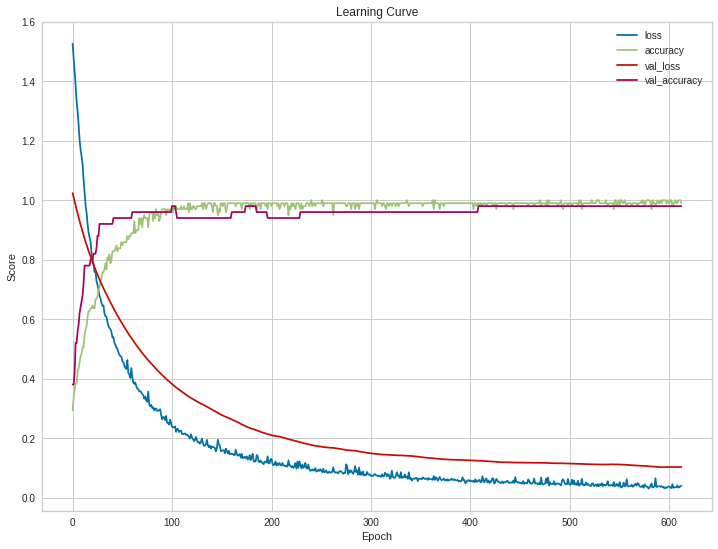

In [52]:
plot_history(history)

#### ROC/AUC

In [53]:
classes = y.columns

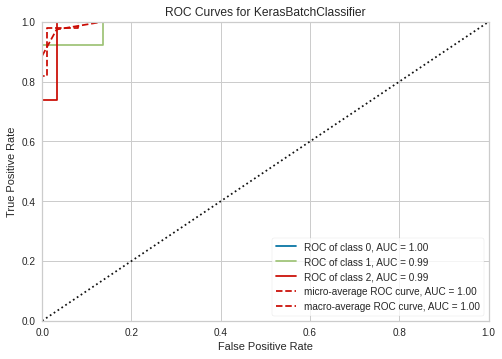

In [54]:
roc_auc(model, X_train, y_train.idxmax(axis=1), X_test = X_test, y_test = y_test.idxmax(axis=1), classes = classes);

#### Classification report

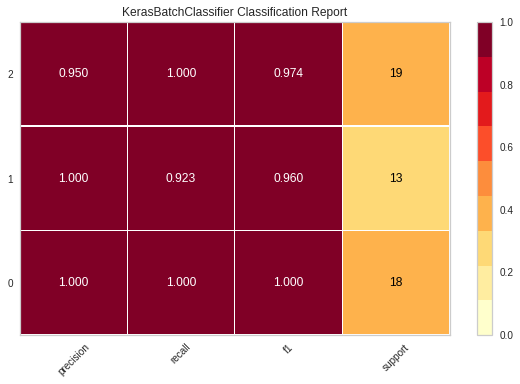

In [55]:
classification_report(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes, support=True);

#### Confusion matrix

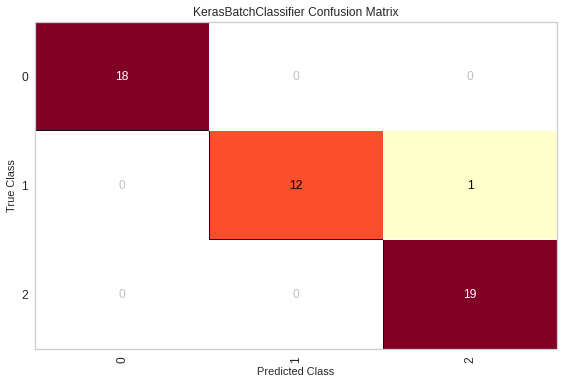

In [56]:
confusion_matrix(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes);

#### Class prediction error

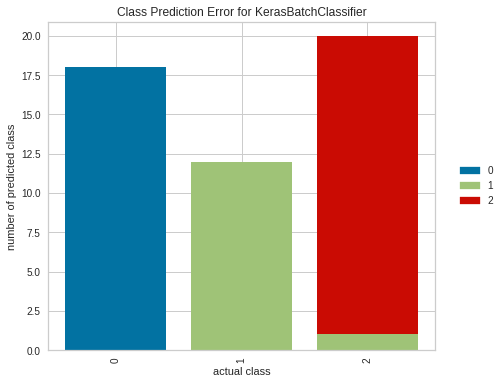

In [57]:
class_prediction_error(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes);